<a href="https://colab.research.google.com/github/Shubham-droid24/Capstone-Project-3-Classification/blob/main/Cardio_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction Capstone Project**    - 



##### **Name**    - Shubham Sharma
##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

### **Why do we need to do this project?**

Cardiovascular disease is the leading cause of death worldwide and a major public health concern. Therefore, its risk assessment is crucial to many existing treatment guidelines. Risk estimates are also being used to predict the magnitude of future cardiovascular disease mortality and morbidity at the population level and in specific subgroups to inform policymakers and health authorities about these risks. Additionally, risk prediction inspires individuals to change their lifestyle and behaviour and to adhere to medications.

This project involves solving a real-world medical problem of predicting coronary heart disease for a patient in future and building up machine learning models for the same.

### **Summary**

I have summarized the project in 4 steps that how the flow of the project goes:-

**First,** I understood the Cardiovascular risk dataset in which we are provided with patients information from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. I understood all the variables and how they can be important to the target variable i.e Ten Year CHD.

**Second,** From Heart Rate column and BMI coumn(numerical), created new columns named Heart Rate Label and BMI Label which classify the Heart Rate as Low, Normal or High and the BMI as Underweight, Healthyweight, Overweight or Obese respectively in order to use them for visualization purpose.

In visualization, I started from univariate analysis to bivariate and multivariate analysis and in every visualization comparing TenYearCHD with other variables in order to understand the relation and impact or importance of them.
From the visualization, I defined and tested three hypothesis and rejected all of them as p-value was less than significance level.

**Third,** I have done preprocessing which is important before model implementation. In this, I handled missing values and treated outliers
, encoding the categorical variables, some feature engineering selection done on the basis of correlation to create new features and remove old ones. 

After having selection of important features I transformed some of them, done data splitting and feature scaling. All these were important to be done as they create a great impact on the model performance.     

**Last,** I build different models and predicted whether patient is at risk of Ten Year CHD or not and compared the results of different models developed. Also, I found the most important features required to predict patient is at risk of Ten Year CHD.





# **GitHub Link -**

https://github.com/Shubham-droid24/Capstone-Project-3-Classification.git

# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import necessary libraries

# Import numpy and pandas for data analysis
import numpy as np
import pandas as pd

# Import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

import math
import datetime as dt

# Import scipy for hypothesis testing
from scipy.stats import *

# Import necessary things for pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Import ML Algorithms for model implementation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
cardio_risk_df=pd.read_csv('/content/drive/MyDrive/Files/data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# Dataset First Look
# First Five Rows
cardio_risk_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Last Five Rows
cardio_risk_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
cardio_risk_df.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
cardio_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(cardio_risk_df[cardio_risk_df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
cardio_risk_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

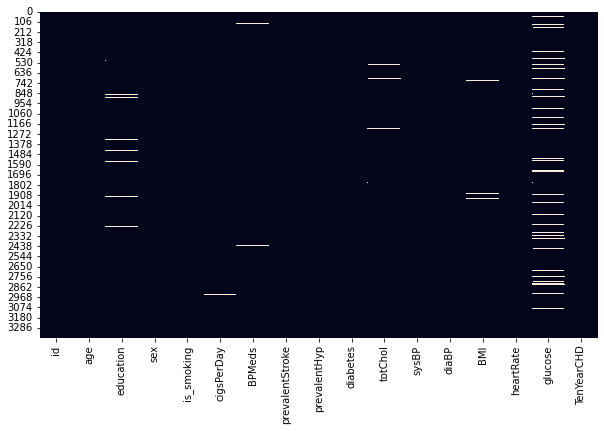

In [ ]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (10, 6)
sns.heatmap(cardio_risk_df.isnull(),cbar=False)

### What did you know about your dataset?

There is a dataset given i.e data_cardiovascular_risk as a csv file and I have loaded the dataset into a dataframe named as cardio_risk_df. The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

The dataset provides the patients information and includes over 3390 records and 17 attributes( including Patient Id and Ten Year CHD ). Each attribute is a potential risk factor and there are demographic, behavorial and medical risk factors.

There are no duplicate values in the dataset but there are missing values in some of the columns. 


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(cardio_risk_df.columns)

['id',
 'age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [ ]:
# Dataset Describe
cardio_risk_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

There are 17 variables which are described as follows:

1) **Id** : Patient's id

### **Demographic Variables** :

2) **Age** : Age of the patient(Continuous)

3) **Sex** : Male or female("M" or "F")(Nominal)

4) **Education** : No information provided(categories : 1,2,3,4)

### **Behavorial Variables** :

5) **Is_smoking** : Whether the patient is a current smoker or not(1 : "YES" or 0 : "NO")(Nominal)

6) **Cigs Per Day** : The number of cigarettes that the person smoked on average in one day.(Continuous)

### **Medical History** :

7) **BP Meds** : whether the patient was on blood pressure medication or not(1 : "YES" or 0 : "NO")(Nominal)

8) **Prevalent Stroke** : whether the patient had previously had a stroke or not(1 : "YES" or 0 : "NO")(Nominal)

9) **Prevalent Hyp** : whether the patient was hypertensive or not(1 : "YES" or 0 : "NO") (Nominal)

10) **Diabetes** : whether the patient had diabetes or not(1 : "YES" or 0 : "NO")(Nominal)

### **Current Medical Condition** :

11) **Tot Chol** : total cholesterol level (Continuous)

12) **Sys BP** : systolic blood pressure (Continuous)

13) **Dia BP** : diastolic blood pressure (Continuous)

14) **BMI** : Body Mass Index (Continuous)

15) **Heart Rate** : heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

16) **Glucose** : glucose level (Continuous)

### **Target Variable** :

17) **TenYearCHD** : 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)


### Check Unique Values for each variable.

In [ ]:
# Check No. of Unique Values for each variable
for i in list(cardio_risk_df.columns.difference(['id'])):
  print(f'No. of unique values in {i} is {cardio_risk_df[i].nunique()}')

No. of unique values in BMI is 1259
No. of unique values in BPMeds is 2
No. of unique values in TenYearCHD is 2
No. of unique values in age is 39
No. of unique values in cigsPerDay is 32
No. of unique values in diaBP is 142
No. of unique values in diabetes is 2
No. of unique values in education is 4
No. of unique values in glucose is 132
No. of unique values in heartRate is 68
No. of unique values in is_smoking is 2
No. of unique values in prevalentHyp is 2
No. of unique values in prevalentStroke is 2
No. of unique values in sex is 2
No. of unique values in sysBP is 226
No. of unique values in totChol is 240


In [ ]:
# Check Unique Values for each variable
for i in list(cardio_risk_df.columns.difference(['id'])):
  print(f'Unique values in {i} is {cardio_risk_df[i].unique()}\n')

Unique values in BMI is [  nan 29.77 20.35 ... 29.19 19.71 31.09]

Unique values in BPMeds is [ 0. nan  1.]

Unique values in TenYearCHD is [1 0]

Unique values in age is [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]

Unique values in cigsPerDay is [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]

Unique values in diaBP is [ 85.   98.   71.   88.  121.  136.   68.   78.   81.   86.5  62.   97.
 120.   89.  105.   93.   91.   92.   86.   73.   70.   74.5  84.   80.
  82.   70.5  74.   63.   65.   76.   64.  106.   75.5  79.5  89.5  83.
  94.   97.5  75.   57.   90.   87.  103.   96.  104.   82.5  80.5  66.5
 100.   72.   99.   67.5  77.5  85.5  95.   79.   77.   69.   72.5  73.5
 101.5  62.5  96.5  68.5 102.  122.5 114.   60.   84.5 124.  100.5  59.
  88.5 108.   66.   67.   95.5 107.   78.5 101.   92.5  81.5  91.5  98.5
  93.5 1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Making a copy of the dataset cardio_risk_df for data wrangling
cardio_df = cardio_risk_df.copy() 

In [ ]:
# Creating a function heartRate
def heartRate(row):
  ''' This function is used to classify level of heart rate as Low,Normal or High'''
  if row < 60:           # 60 BPM (Beats Per Minute)
        value = 'Low'      # Low Heart Rate
  elif row < 100:        # 100 BPM (Beats Per Minute)
        value = 'Normal'   # Normal Heart Rate
  else:
        value = 'High'     # High Heart Rate
    
  return value

# Applying above function and creating a new feature containing the classes of Heart Rate
cardio_df['heartRateLabel'] = cardio_df['heartRate'].apply(heartRate)

# Dropping the old feature
cardio_df.drop(['heartRate'],axis=1,inplace= True)

In [ ]:
# Creating a function BMI
def BMI(row):
  ''' This function is used to classify Body Mass Index(BMI) as Underweight, Healthyweight, Overweight or Obese '''
  if row < 18.5:        # BMI = 18.5
        bmi = 'Underwt'   # Under Weight
  elif row < 25:        # BMI = 25
        bmi = 'Healthywt' # Healthy Weight
  elif row < 30:        # BMI = 30
        bmi = 'Overwt'    # Over Weight
  else:
      bmi = 'Obese'       # Obesity
    
  return bmi

# Applying above function and creating a new feature containing the classes of BMI
cardio_df['BMILabel'] = cardio_df['BMI'].apply(BMI)

# Dropping the old feature
cardio_df.drop(['BMI'],axis=1,inplace= True)

In [ ]:
# Target variable should be the last column
columns=list(cardio_df.columns)
columns.remove('TenYearCHD')
columns.append('TenYearCHD')
cardio_df=cardio_df[columns]
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,heartRateLabel,BMILabel,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,80.0,Normal,Obese,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,75.0,Normal,Overwt,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,94.0,Normal,Healthywt,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,94.0,Normal,Overwt,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,77.0,Normal,Overwt,0


### What all manipulations have you done and insights you found?

Data Manipulation done is as follows :

1) Creating a copy of the dataset named as cardio_df for doing data wrangling.

2) From Heart Rate column (numerical), created a new column named Heart Rate Label which classify the Heart Rate as Low, Normal or High( making it an ordinal categorical column ) and dropping the old one. This helps in easy interpretation of the data in the column given.

3)  From BMI column (numerical), created a new column named BMI Label which classify the BMI as Underweight, Healthyweight, Overweight or Obese( making it an ordinal categorical column ) and dropping the old one. This helps in easy interpretation of the data in the column given.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Age vs TenYearCHD

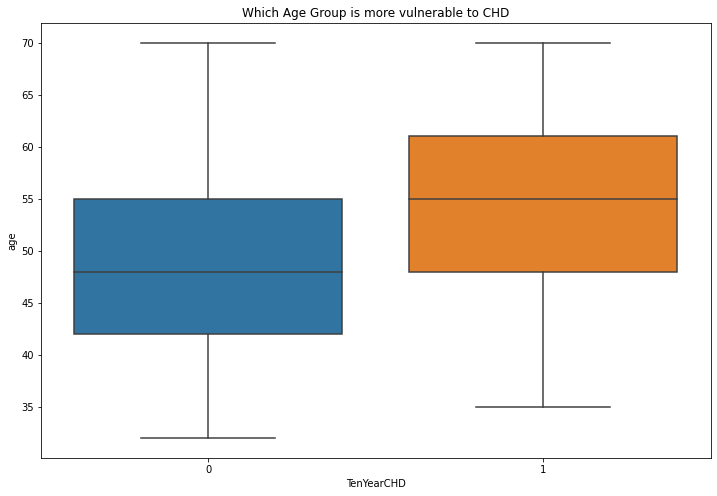

In [ ]:
# Chart - 1 visualization code
# Plotting Boxplot 
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(x='TenYearCHD',y='age',data=cardio_df)
plt.title("Which Age Group is more vulnerable to CHD")
plt.show()

##### 1. Why did you pick the specific chart?




Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.


##### 2. What is/are the insight(s) found from the chart?

We came to know :

1) There is no distinct age group which are at risk and not at risk.

2) Roughly, patients having age upto 50 are less prone and beyond 50 are more prone to CHD. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that patients after the age of 50 are more prone to Coronary Heart Disease(CHD).

#### Chart - 2 Sex vs TenYearCHD

In [ ]:
# Distribution of gender in the sex column
round(cardio_df['sex'].value_counts()/len(cardio_df)*100,2)

F    56.73
M    43.27
Name: sex, dtype: float64

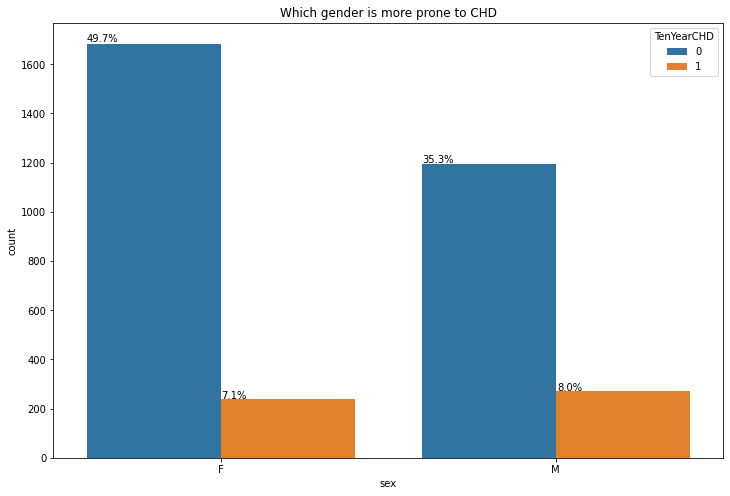

In [ ]:
# Chart - 2 visualization code
# Plotting Barplot
plt.rcParams['figure.figsize'] = (12, 8)
ax = sns.countplot(x = cardio_df['sex'], hue = cardio_df['TenYearCHD'])
plt.title("Which gender is more prone to CHD")
for p in ax.patches:
    ax.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know :    
 On the basis of gender, patients which are at risk of CHD(out of the total): 

 Females are 7.1% out of 56.7 %.

 Males are 8% out of 43.3 %.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that Males are more prone to CHD as compared to Females.

#### Chart - 3 Is_smoking vs TenYearCHD

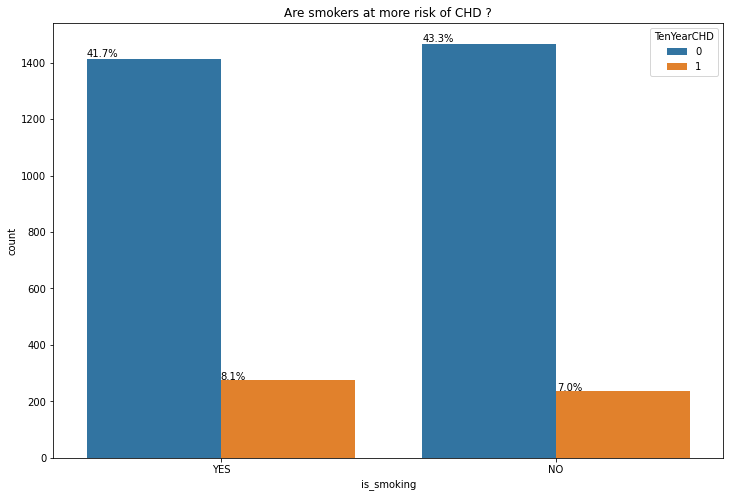

In [ ]:
# Chart - 3 visualization code
# Plotting Barplot
plt.rcParams['figure.figsize'] = (12, 8)
ax1 = sns.countplot(x = cardio_df['is_smoking'], hue = cardio_df['TenYearCHD'])
plt.title("Are smokers at more risk of CHD ?")
for p in ax1.patches:
    ax1.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We came to know :    
 On the basis of smoking, patients which are at risk of CHD(out of the total): 

 Patients who don't smoke are 7 % 

 Patients who smoke are 8.1 % 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that Smokers are more prone to CHD as compared to Non-Smokers but there is not a significant difference( only 1 % )

#### Chart - 4 Cigs Per Day vs TenYearCHD

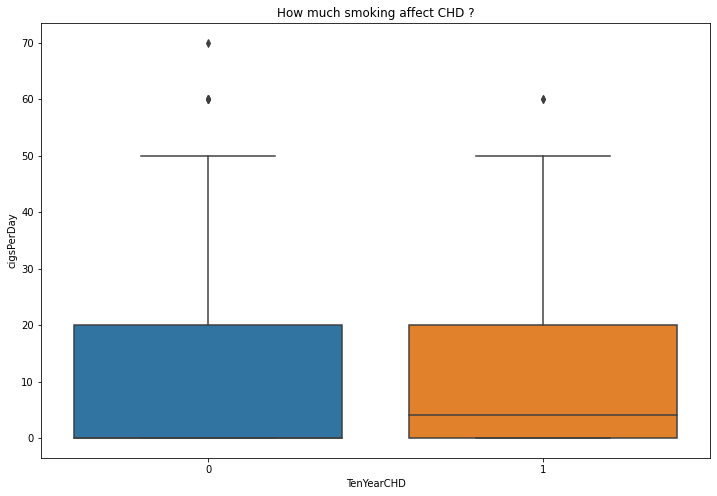

In [ ]:
# Chart - 4 visualization code
# Plotting Boxplot
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(x='TenYearCHD',y='cigsPerDay',data=cardio_df)
plt.title("How much smoking affect CHD ?")
plt.show()

##### 1. Why did you pick the specific chart?




Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.


##### 2. What is/are the insight(s) found from the chart?

We came to know : 

Patients having risk and not having risk of CHD, don't have a difference in the amount of cigarette consumed per day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that number of cigarettes consumed per day has no effect on the risk of CHD.

#### Chart - 5 BPMeds vs TenYearCHD

In [ ]:
# Distribution of classes in BPMeds column
cardio_df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

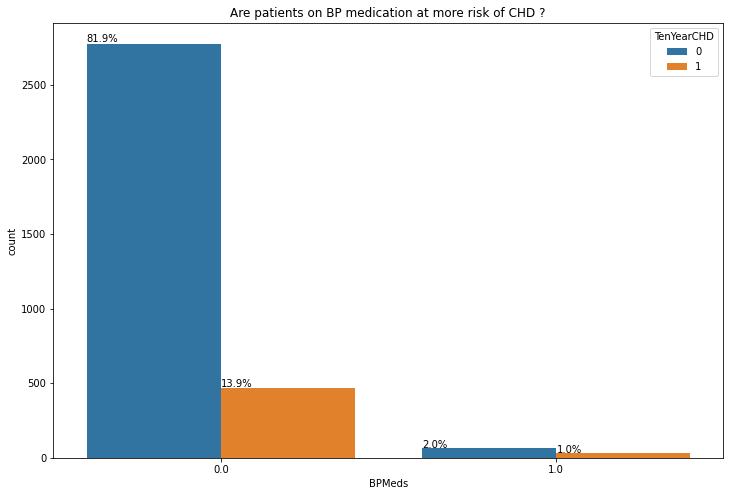

In [ ]:
# Chart - 5 visualization code
# Plotting Barplot
plt.rcParams['figure.figsize'] = (12, 8)
ax2 = sns.countplot(x = cardio_df['BPMeds'], hue = cardio_df['TenYearCHD'])
plt.title("Are patients on BP medication at more risk of CHD ?")
for p in ax2.patches:
    ax2.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know :    
 On the basis of BP Meds, patients which are at risk of CHD(out of the total): 

 Patients who are not on BP Medication are 13.9 % 

 Patients who are on BP Medication are 1 % 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that BP Medication has no effect on the risk of CHD. (Instead more patients are prone to CHD who don't are on BP Medication)

**This may be due to only 3 % patients out of the total are on BP Medication**. **So, we can't infer whether BP Meds has an effect on risk of CHD or not.** 

#### Chart - 6 PrevalentStroke vs TenYearCHD

In [ ]:
# Distribution of classes in prevalentStroke column
cardio_df['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

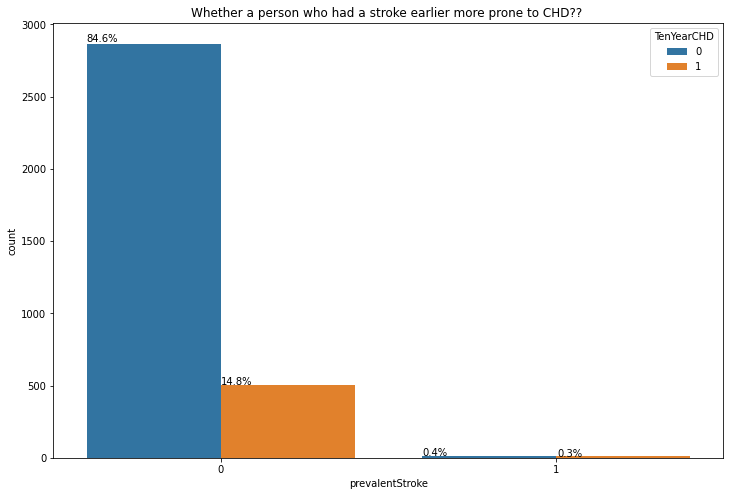

In [ ]:
# Chart - 6 visualization code
# Plotting Barplot
plt.rcParams['figure.figsize'] = (12, 8)
ax3 = sns.countplot(x = cardio_df['prevalentStroke'], hue = cardio_df['TenYearCHD'])
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
for p in ax3.patches:
    ax3.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know :    
 On the basis of Prevalent Stroke, patients which are at risk of CHD(out of the total): 

 Patients who don't had a stroke are 14.8 % 

 Patients who had a stroke are 0.3 % 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that Prevalent Stroke has no effect on the risk of CHD. (Instead more patients are prone to CHD who don't had a stroke earlier.)

**This may be due to only 0.7 % patients out of the total had a stroke earlier.** **So, we can't infer whether Prevalent Stroke has an effect on risk of CHD or not.**

#### Chart - 7 PrevalentHyp vs TenYearCHD

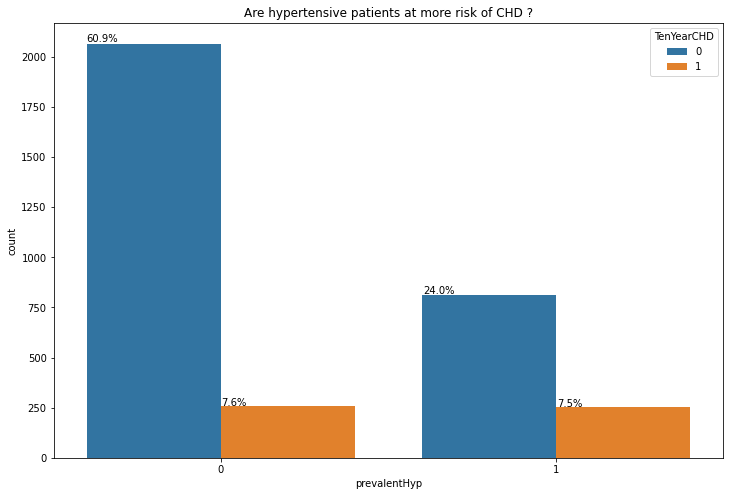

In [ ]:
# Chart - 7 visualization code
# Plotting Barplot
plt.rcParams['figure.figsize'] = (12, 8)
ax4 = sns.countplot(x = cardio_df['prevalentHyp'], hue = cardio_df['TenYearCHD'])
plt.title("Are hypertensive patients at more risk of CHD ?")
for p in ax4.patches:
    ax4.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know :    
 On the basis of Prevalent Hypertension, patients which are at risk of CHD(out of the total): 

 Patients who don't had hypertension are 7.6 % 

 Patients who had hypertension are 7.5 % 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that Prevalent Hypertension has an effect on the risk of CHD. There are around 69 % patients which don't had hypertension and 30 % patients had hypertension.

Due to this imbalance, we are getting equally prone to CHD in percentage for both type of patients.



#### Chart - 8 TotChol vs TenYearCHD

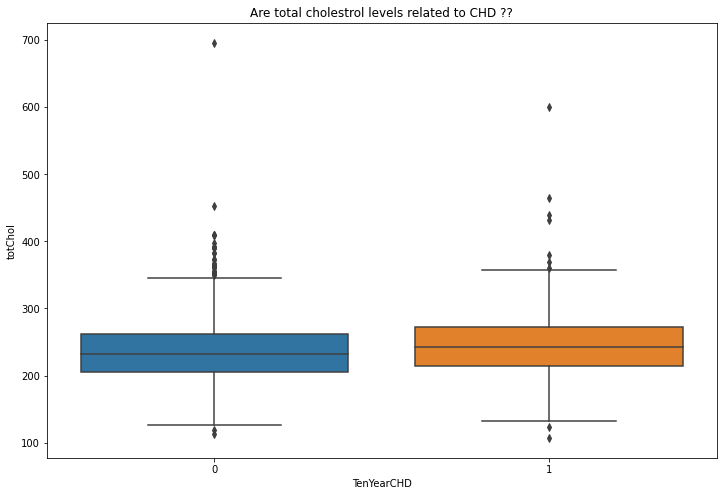

In [ ]:
# Chart - 8 visualization code
# Plotting Boxplot
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(x = cardio_df['TenYearCHD'], y = cardio_df['totChol'])
plt.title("Are total cholestrol levels related to CHD ??")
plt.show()

##### 1. Why did you pick the specific chart?




Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.


##### 2. What is/are the insight(s) found from the chart?

We came to know : 
 
The distribution of total cholestrol level for patients having or not having risk of CHD is almost same.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease. Clearly, there is no direct correlation of coronary heart disease with the cholestrol level.

#### Chart - 9 SysBP and DiaBP vs TenYearCHD

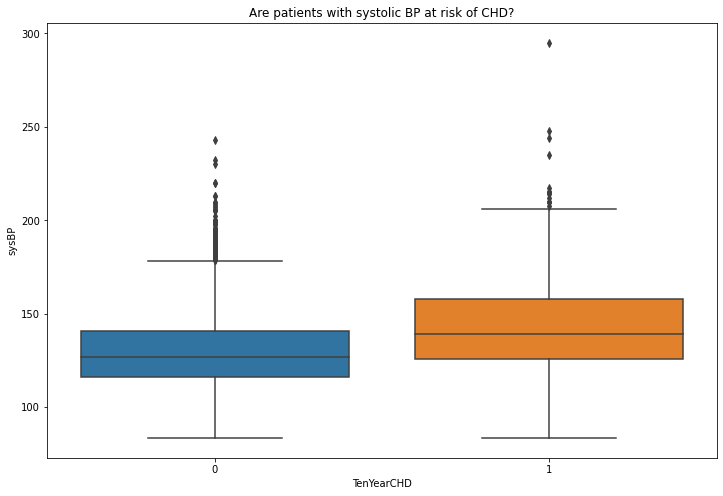

In [ ]:
# Chart - 9 visualization code
# Plotting Boxplot
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(x = cardio_df['TenYearCHD'], y = cardio_df['sysBP'])
plt.title("Are patients with systolic BP at risk of CHD?")
plt.show()

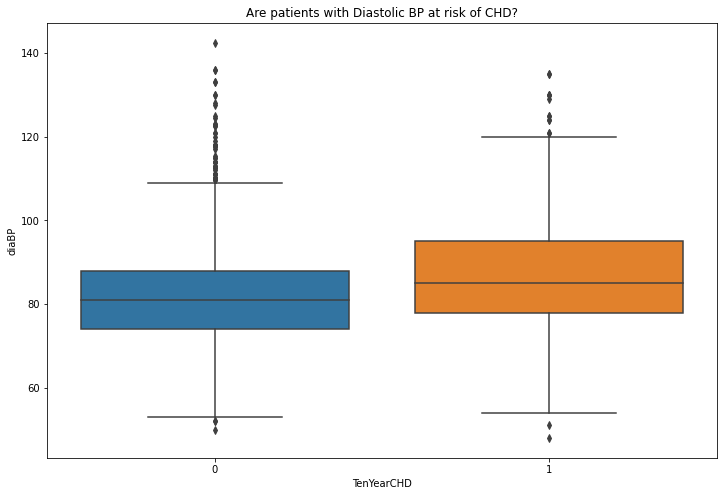

In [ ]:
# Chart - 9 visualization code
# Plotting Boxplot
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(x = cardio_df['TenYearCHD'], y = cardio_df['diaBP'])
plt.title("Are patients with Diastolic BP at risk of CHD?")
plt.show()

##### 1. Why did you pick the specific chart?




Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.


##### 2. What is/are the insight(s) found from the chart?

We came to know : 

The distributions of both systolic BP and diastolic BP for patients having risk of CHD are slightly upward than the patients don't having risk of CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that sysBP and DiaBP have an effect on the risk of CHD but there is not a significant effect. 

#### Chart - 10 BMI vs TenYearCHD

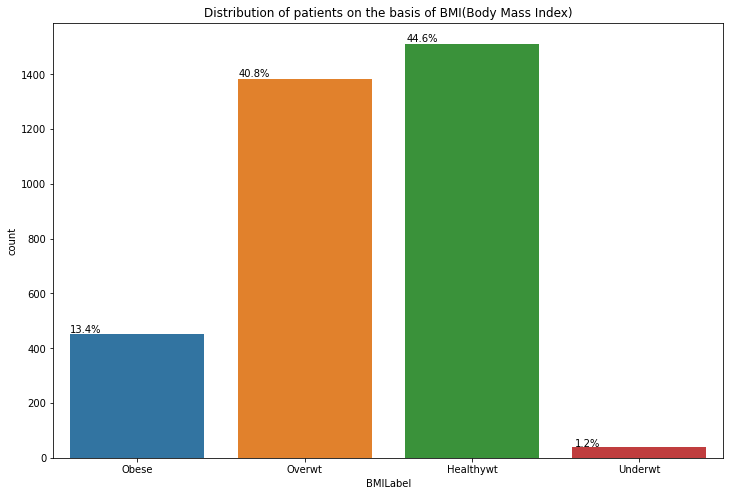

In [ ]:
# Chart - 10 visualization code
# Plotting Barplot
plt.rcParams['figure.figsize'] = (12, 8)
ax5 = sns.countplot(x = cardio_df['BMILabel'])
plt.title("Distribution of patients on the basis of BMI(Body Mass Index)")

for p in ax5.patches:
    ax5.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

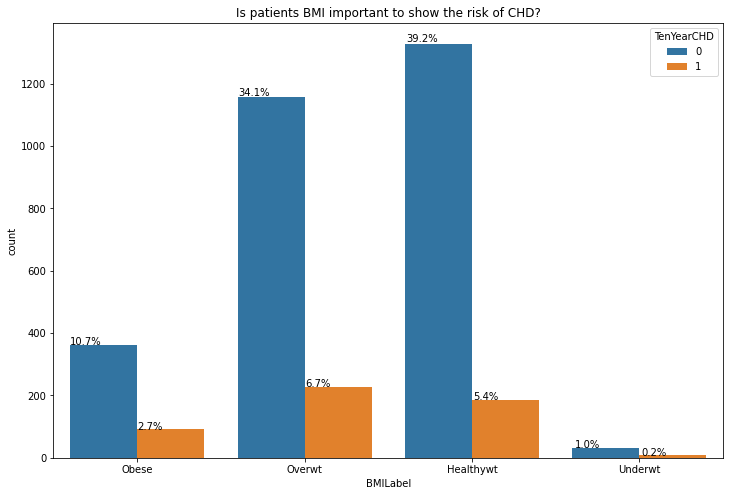

In [ ]:
# Chart - 10 visualization code
# Plotting Barplot
plt.rcParams['figure.figsize'] = (12, 8)
ax6 = sns.countplot(x = cardio_df['BMILabel'], hue = cardio_df['TenYearCHD'])
plt.title('Is patients BMI important to show the risk of CHD?')

for p in ax6.patches:
    ax6.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know :    
 On the basis of BMI Label, patients which are at risk of CHD(out of the total): 

 Patients who are Healthyweight are 5.4 % 

 Patients who are Overweight are 6.7 % 

 Patients who are Obese are 2.7 % 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that BMI has an effect on the risk of CHD which is as follows :

For Overweight, around 15 % of patients out of them have risk of CHD

For Obese, around 20 % of patients out of them have risk of CHD




#### Chart - 11 HeartRate vs TenYearCHD

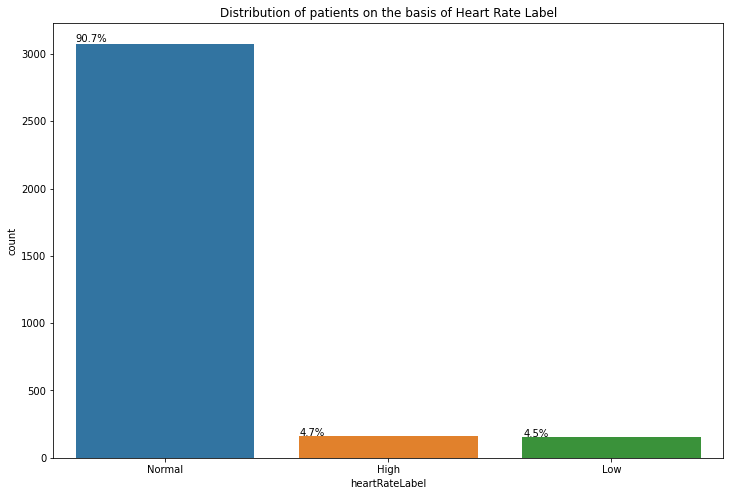

In [ ]:
# Chart - 11 visualization code
# Plotting Barplot
plt.rcParams['figure.figsize'] = (12, 8)
ax7 = sns.countplot(x = cardio_df['heartRateLabel'])
plt.title('Distribution of patients on the basis of Heart Rate Label')
for p in ax7.patches:
    ax7.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

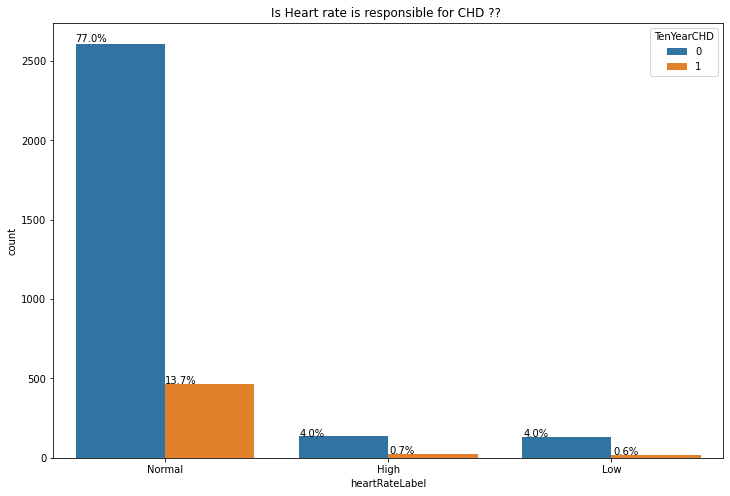

In [ ]:
# Chart - 11 visualization code
# Plotting Barplot
plt.rcParams['figure.figsize'] = (12, 8)
ax8 = sns.countplot(x = cardio_df['heartRateLabel'],hue= cardio_df['TenYearCHD'])
plt.title("Is Heart rate is responsible for CHD ?? ")
for p in ax8.patches:
    ax8.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know :    
 On the basis of Heart Rate Label, patients which are at risk of CHD(out of the total): 

 Patients who have High Heart Rate are 0.7 % 

 Patients who have Low Heart Rate are 0.6 % 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that Heart Rate has an effect on the risk of CHD which is as follows :

For High Heart Rate patients, around 20 %  out of them have risk of CHD

 For Low Heart Rate patients, around 15 %  out of them have risk of CHD



#### Chart - 12 Diabetes and glucose vs TenYearCHD

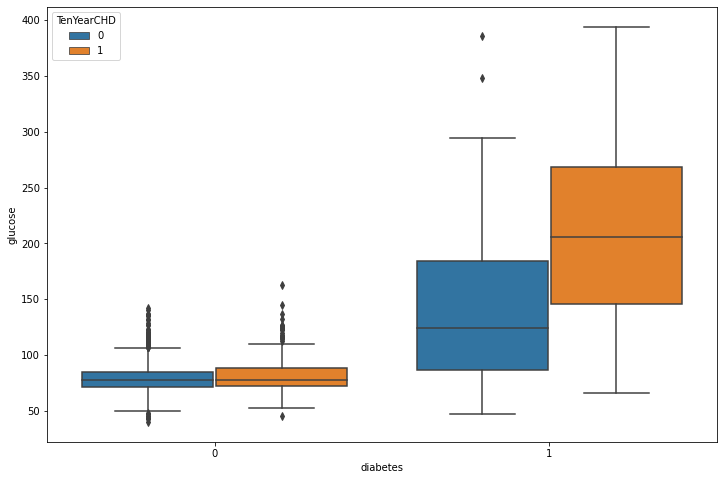

In [ ]:
# Chart - 12 visualization code
# Plotting Boxplot
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(x = cardio_df['diabetes'],y= cardio_df['glucose'], hue = cardio_df['TenYearCHD'])
plt.title('Effect of diabetes and glucose on the risk of CHD')
plt.show()

##### 1. Why did you pick the specific chart?




Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.


##### 2. What is/are the insight(s) found from the chart?

We came to know : 

1) The distribution of glucose level for patients having diabetes and risk of CHD is higher than those having diabetes but don't having risk of CHD.

2) The distribution of glucose level for patients don't having diabetes but having risk of CHD is similar to those don't having diabetes and risk of CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that diabetes and glucose level have an effect on the risk of CHD.

#### Chart - 13 - Correlation Heatmap

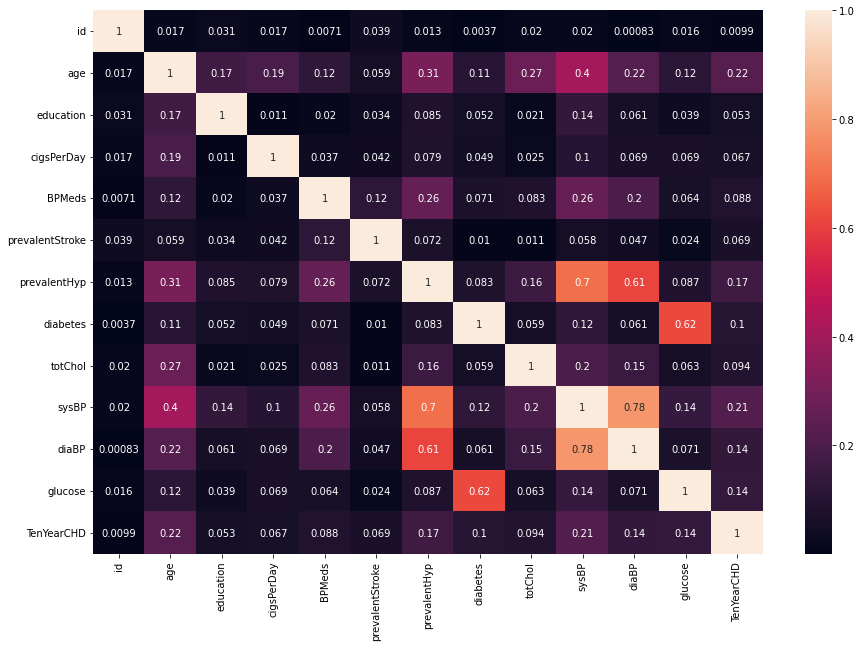

In [ ]:
# Correlation Heatmap visualization code
# Plotting Heatmap
plt.figure(figsize=(15,10))
correlation = cardio_df.corr()
sns.heatmap(abs(correlation), annot=True)

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

We came to know : 

1) Glucose level and diabetes are highly positively correlated (having  correlation value of 0.62).

2) Both Systolic BP and Diastolic BP are highly positively correlated with Prevalent Hypertension (having correlation value of 0.7 and 0.61 respectively).

3) Age and Systolic BP are positively correlated (having correlation value of 0.4).

4) Systolic BP and Diastolic BP are highly positively correlated (having correlation value of 0.78).



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1) The mean BMI of people with heart disease is less than or equal to the mean BMI of people without heart disease.

2) The mean Heart Rate of people with heart disease is less than or equal to the mean Heart Rate of people without heart disease.

3) The mean cholestrol of people with heart disease is less than or equal to the mean cholestrol of people without heart disease.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** : The mean BMI of people with heart disease is less than or equal to the mean BMI of people without heart disease.

**Alternate Hypothesis** : The mean BMI of people with heart disease is greater than the mean BMI of people without heart disease.

**Test Type:** 2 Sample T-test(Right Tailed Test)

**Significance level** = 0.05

#### 2. Perform an appropriate statistical test.

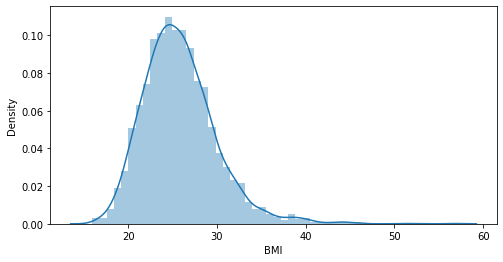

In [ ]:
# Plotting histogram of BMI column
plt.rcParams['figure.figsize'] = (8, 4)
sns.distplot(cardio_risk_df['BMI'])

In [ ]:
# Perform Statistical Test to obtain P-Value

# Finding sample size, mean and standard deviation of 2 samples 
n_bmi_chd_0=333      # Sample size taken from sample size table
n_bmi_chd_1=217      # Sample size taken from sample size table
Mean_bmi_chd_0 = np.mean(cardio_risk_df.loc[cardio_risk_df['TenYearCHD']==0,'BMI'][:333])
Mean_bmi_chd_1 = np.mean(cardio_risk_df.loc[cardio_risk_df['TenYearCHD']==1,'BMI'][:217])
Std_bmi_chd_0 = np.std(cardio_risk_df.loc[cardio_risk_df['TenYearCHD']==0,'BMI'][:333])
Std_bmi_chd_1 = np.std(cardio_risk_df.loc[cardio_risk_df['TenYearCHD']==1,'BMI'][:217])

In [ ]:
# Ratio of standard deviations of either of 2 samples(should be between 0.5 and 2)
Std_bmi_chd_0/Std_bmi_chd_1

0.8777028274622339

In [ ]:
# Calculating pooled standard deviation
sp_hyp1 = ((n_bmi_chd_0-1)*Std_bmi_chd_0**2 + (n_bmi_chd_1-1)*Std_bmi_chd_1**2)/(n_bmi_chd_0+n_bmi_chd_1-2)

sp_hyp1 = np.sqrt(sp_hyp1)

In [ ]:
# Calculating t - value
t_value_hyp1 = (Mean_bmi_chd_1-Mean_bmi_chd_0)/(sp_hyp1*np.sqrt(1/n_bmi_chd_0 + 1/n_bmi_chd_1))
t_value_hyp1

1.771809119776652

In [ ]:
# Finding p - value
p1 = round(1 - t.cdf(t_value_hyp1,n_bmi_chd_0+n_bmi_chd_1-2),5)
p1

0.03849

As p1 < Significance level(0.05), 
Null Hypothesis rejected Successfully for p = .03849

##### Which statistical test have you done to obtain P-Value?

I have used 2 Sample T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and the mean BMI of people with heart disease is not less than or equal to the mean BMI of people without heart disease.

##### Why did you choose the specific statistical test?

From the BMI distribution we can see that most of the values lie on the left side and tail is on the right side. So, the distribution is positively skewed. For a skewed data, Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, I used T-test for hypothesis testing.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** : The mean heart rate of people with heart disease is less than or equal to the mean heart rate of people without heart disease.

**Alternate Hypothesis** : The mean heart rate of people with heart disease is greater than the mean heart rate of people without heart disease.

**Test Type:** 2 Sample T-test(Right Tailed Test)

**Significance level** = 0.05

#### 2. Perform an appropriate statistical test.

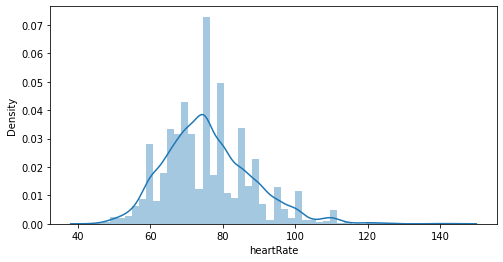

In [ ]:
# Plotting histogram of heart Rate column
sns.distplot(cardio_risk_df['heartRate'])

In [ ]:
# Perform Statistical Test to obtain P-Value
# Finding sample size, mean and standard deviation of 2 samples 
n_hrate_chd_0=333       # Sample size taken from sample size table
n_hrate_chd_1=217       # Sample size taken from sample size table
Mean_hrate_chd_0 = np.mean(cardio_risk_df.loc[cardio_risk_df['TenYearCHD']==0,'heartRate'][:333])
Mean_hrate_chd_1 = np.mean(cardio_risk_df.loc[cardio_risk_df['TenYearCHD']==1,'heartRate'][:217])
Std_hrate_chd_0 = np.std(cardio_risk_df.loc[cardio_risk_df['TenYearCHD']==0,'heartRate'][:333])
Std_hrate_chd_1 = np.std(cardio_risk_df.loc[cardio_risk_df['TenYearCHD']==1,'heartRate'][:217])

In [ ]:
# Ratio of standard deviations of either of 2 samples(should be between 0.5 and 2)
Std_hrate_chd_0/Std_hrate_chd_1

0.9732145980404758

In [ ]:
# Calculating pooled standard deviation
sp_hyp2 = ((n_hrate_chd_0-1)*Std_hrate_chd_0**2 + (n_hrate_chd_1-1)*Std_hrate_chd_1**2)/(n_hrate_chd_0+n_hrate_chd_1-2)

sp_hyp2 = np.sqrt(sp_hyp2)

In [ ]:
# Calculating t - value
t_value_hyp2 = (Mean_hrate_chd_1-Mean_hrate_chd_0)/(sp_hyp2*np.sqrt(1/n_hrate_chd_0 + 1/n_hrate_chd_1))
t_value_hyp2

1.7417711716541302

In [ ]:
# Finding p - value
p2 = round(1 - t.cdf(t_value_hyp2,n_hrate_chd_0+n_hrate_chd_1-2),5)
p2

0.04105

As p1 < Significance level(0.05), 
Null Hypothesis rejected Successfully for p = 0.04105

##### Which statistical test have you done to obtain P-Value?

I have used 2 Sample T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and the mean Heart Rate of people with heart disease is not less than or equal to the mean Heart Rate of people without heart disease.

##### Why did you choose the specific statistical test?

From the Heart Rate distribution we can see that most of the values lie on the left side and tail is on the right side. So, the distribution is positively skewed. For a skewed data, Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, I used T-test for hypothesis testing.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** : The mean cholestrol of people with heart disease is less than or equal to the mean cholestrol of people without heart disease.

**Alternate Hypothesis** : The mean cholestrol of people with heart disease is greater than the mean cholestrol of people without heart disease.

**Test Type:** 2 Sample T-test(Right Tailed Test)

**Significance level** = 0.05

#### 2. Perform an appropriate statistical test.

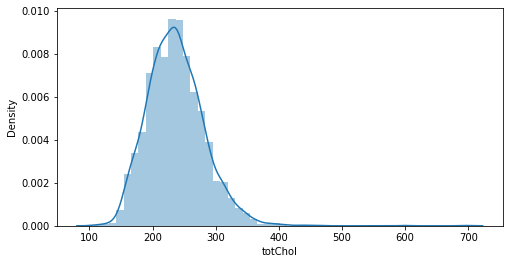

In [ ]:
# Plotting histogram of totChol column
sns.distplot(cardio_risk_df['totChol'])

In [ ]:
# Perform Statistical Test to obtain P-Value
# Finding sample size, mean and standard deviation of 2 samples 
n_chol_chd_0=333         # Sample size taken from sample size table
n_chol_chd_1=217         # Sample size taken from sample size table
Mean_chol_chd_0 = np.mean(cardio_risk_df.loc[cardio_risk_df['TenYearCHD']==0,'totChol'][:333])
Mean_chol_chd_1 = np.mean(cardio_risk_df.loc[cardio_risk_df['TenYearCHD']==1,'totChol'][:217])
Std_chol_chd_0 = np.std(cardio_risk_df.loc[cardio_risk_df['TenYearCHD']==0,'totChol'][:333])
Std_chol_chd_1 = np.std(cardio_risk_df.loc[cardio_risk_df['TenYearCHD']==1,'totChol'][:217])

In [ ]:
# Ratio of standard deviations of either of 2 samples(should be between 0.5 and 2)
Std_chol_chd_0/Std_chol_chd_1

0.8078286960518938

In [ ]:
# Calculating pooled standard deviation
sp_hyp3 = ((n_chol_chd_0-1)*Std_chol_chd_0**2 + (n_chol_chd_1-1)*Std_chol_chd_1**2)/(n_chol_chd_0+n_chol_chd_1-2)

sp_hyp3 = np.sqrt(sp_hyp3)

In [ ]:
# Calculating t - value
t_value_hyp3 = (Mean_chol_chd_1-Mean_chol_chd_0)/(sp_hyp3*np.sqrt(1/n_chol_chd_0 + 1/n_chol_chd_1))
t_value_hyp3

1.7754866612046942

In [ ]:
# Finding p - value
p3 = round(1 - t.cdf(t_value_hyp3,n_chol_chd_0+n_chol_chd_1-2),5)
p3

0.03819

As p1 < Significance level(0.05), 
Null Hypothesis rejected Successfully for p = 0.03819

##### Which statistical test have you done to obtain P-Value?

I have used 2 Sample T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and the mean cholestrol of people with heart disease is not less than or equal to the mean cholestrol of people without heart disease.

##### Why did you choose the specific statistical test?

From the total cholestrol distribution we can see that most of the values lie on the left side and tail is on the right side. So, the distribution is positively skewed. For a skewed data, Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, I used T-test for hypothesis testing.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Making a copy of dataset cardio_df for Pre-processing
cvs_df = cardio_df.copy() 

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Checking missing values in each column(as percentage)
round(cvs_df.isnull().sum()/len(cvs_df)*100,2)

id                 0.00
age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
glucose            8.97
heartRateLabel     0.00
BMILabel           0.00
TenYearCHD         0.00
dtype: float64

In [ ]:
# Dropping the rows having missing values in Cigs Per Day column
cvs_df.drop(index=cvs_df[cvs_df['cigsPerDay'].isna()].index,axis=0,inplace=True)

In [ ]:
# Imputing the missing values of Education and BPMeds columns with their most occuring values i.e mode respectively
cvs_df['education'].fillna(cvs_df['education'].mode()[0], inplace = True)

cvs_df['BPMeds'].fillna(cvs_df['BPMeds'].mode()[0],inplace = True)

In [ ]:
# Imputing the missing values of TotChol and Glucose columns with their medians respectively
cvs_df['totChol'].fillna(cvs_df['totChol'].median(),inplace = True)

cvs_df['glucose'].fillna(cvs_df['glucose'].median(),inplace = True)

In [ ]:
# Assigning correct data types to the respective columns after handling missing values
cvs_df['education']=cvs_df['education'].astype(int)

cvs_df['cigsPerDay']=cvs_df['cigsPerDay'].astype(int)

cvs_df['BPMeds']=cvs_df['BPMeds'].astype(int)

cvs_df['totChol']=cvs_df['totChol'].astype(int)

cvs_df['glucose']=cvs_df['glucose'].astype(int)


In [ ]:
# Checking data types of each column
cvs_df.dtypes

id                   int64
age                  int64
education            int64
sex                 object
is_smoking          object
cigsPerDay           int64
BPMeds               int64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol              int64
sysBP              float64
diaBP              float64
glucose              int64
heartRateLabel      object
BMILabel            object
TenYearCHD           int64
dtype: object

#### What all missing value imputation techniques have you used and why did you use those techniques?

Handling missing values in different columns by using different techniques which are as follows :

1) Dropping the rows having missing values in Cigs Per Day column as it has less than 1 % missing values i.e 0.65 %

2) Imputing the missing values of Education and BPMeds columns with their most occuring values i.e mode respectively as they are categorical columns.

3) Imputing the missing values of TotChol and Glucose columns with their medians respectively as they are numerical columns with outliers.

4) Assigning correct data types to the respective columns after handling missing values i.e making all of them as integers for convenience.

### 2. Handling Outliers

In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

z = (x-mean)/standard deviation

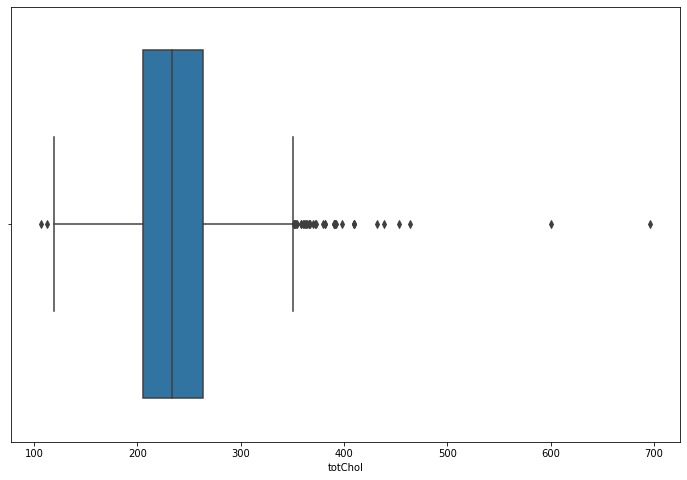

In [ ]:
# Handling Outliers & Outlier treatments
# Detecting Outliers
# Plotting totChol distribution
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(cvs_df['totChol'])



In [ ]:
# Finding threshold total cholestrol value
mean_chol = np.mean(cvs_df['totChol']) # mean
std_chol = np.std(cvs_df['totChol'])   # standard deviation
threshold_chol_outlier=3*std_chol+mean_chol
threshold_chol_outlier

371.8268963274104

In [ ]:
# Finding 1st and 3rd quantiles 
Q1 = cvs_df['totChol'].quantile(0.25)
Q3 = cvs_df['totChol'].quantile(0.75)

# Creating a function chol_outlier
def chol_outlier(row):
  ''' This function is used to replace values of totchol column which are higher than threshold value with upper limit of it '''
  
  if row > threshold_chol_outlier:
    upper_limit = Q3 + 1.5*(Q3-Q1)
    return upper_limit
  else:
    return row

# Applying above function 
cvs_df['totChol']=cvs_df['totChol'].apply(chol_outlier)


##### What all outlier treatment techniques have you used and why did you use those techniques?

The data points that fall below threshold value i.e mean-3*(sigma) or above mean+3*(sigma) are outliers, where mean and sigma are the average value and standard deviation of a particular column.

**Capping Technique (to remove outliers) :** 

In this technique, we cap our outliers data and make the limit i.e, above a particular value or less than that value, all the values will be considered as outliers, and the number of outliers in the dataset is given that capping number. I have given capping number as upper limit of the totChol distribution.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# One Hot Encoding on categorical columns(nominal)

cvs_df=pd.get_dummies(cvs_df,columns=['sex','prevalentHyp'])

In [ ]:
# Ordinal Encoding on ordinal columns - BMI Label and Heart Rate Label
cvs_df['BMILabel']=cvs_df['BMILabel'].map({'Underwt':1,'Healthywt':2,'Overwt':3,'Obese':4})

cvs_df['heartRateLabel']=cvs_df['heartRateLabel'].map({'Low':1,'Normal':2,'High':3})

#### What all categorical encoding techniques have you used & why did you use those techniques?

**One-hot encoding**

One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy.

One-hot encoding is a common method for dealing with categorical data in machine learning. Categorical variables must be changed in the pre-processing section since machine learning models require numeric input variables. Nominal or ordinal data can be found in categorical data.

This approach creates a new column for each unique value in the original category column. The zeros and ones are subsequently put in these dummy variables (1 meaning TRUE, 0 meaning FALSE).

Because this procedure generates several new variables, it is prone to causing a large problem (too many predictors) if the original column has a large number of unique values.

I have used this technique to encode sex and prevalentHyp features.

**Ordinal Encoding**

This type of encoding is used when the variables in the data are ordinal, ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels.For example, a list of patients consists of the level of sugar present in the body of a person which can be divided into high, low and medium classes.


I have used this technique to encode BMI and Heart Rate features.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Creating a function diabetes_grade
def diabetes_grade(glucose):
  ''' This function is used to classify the severity of Diabetes on the basis of Blood glucose levels'''
  if glucose <= 140:   # 140 mg/dL (glucose level)
     value = 1         # 'Normal'
  elif glucose < 200:  # 200 mg/dL (glucose level)
     value = 2         # 'Prediabetic'
  else:
     value = 3         # 'Diabetic'
  
  return value

# Applying above function and creating new feature diabetes_grade which classify the severity of Diabetes
# This new feature will replace 'glucose' and 'diabetes' features
cvs_df['Diabetes_grade'] = cvs_df['glucose'].apply(diabetes_grade)



In [ ]:
# Creating new feature Smoking Factor containing log-transformed values of the Cigs Per Day
# This new feature will replace 'Cigs Per Day' feature
cvs_df['SmokingFactor'] = cvs_df['cigsPerDay'].apply(lambda x: 0 if x < 1 else np.log(x))

In [ ]:
# Creating a function blood_presure_classification
def blood_presure_classification(SysBP, DiaBP):
  ''' This function combines the Systolic and Diastolic blood pressure to classify level of hypertension. '''
  
  if (SysBP < 120) and (DiaBP < 80):    # 120 mm Hg and 80 mm Hg (Blood Pressure level)
    value = 1                           # 'Normal'
  elif (SysBP < 130) and (DiaBP < 80):  # 130 mm Hg and 80 mm Hg (Blood Pressure level)
    value =  2                          # 'Elevated'
  elif (SysBP < 140) or (DiaBP < 90):   # 140 mm Hg and 90 mm Hg (Blood Pressure level)
    value =  3                          # 'Hypertension Stage 1'
  elif (SysBP <= 180) or (DiaBP <= 90): # 180 mm Hg and 90 mm Hg (Blood Pressure level)
    value =  4                          # 'Hypertension Stage 2'
  else :
    value =  5                          # 'Hypertensive Crises'
  
  return value
  
#  Creating new feature Hypertension which classify the level of Blood Pressure
# This new feature will replace 'sysBP' and 'diaBP' features
cvs_df['Hypertension'] = cvs_df.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)

In [ ]:
# Removing old features 
cvs_df.drop(['glucose','diabetes','cigsPerDay','is_smoking','sysBP','diaBP'],axis=1,inplace= True)

# Removing irrelevant features
cvs_df.drop(['BPMeds','prevalentStroke'],axis=1,inplace= True)

In [ ]:
# Setting Id column as index
cvs_df.set_index(['id'],inplace=True)

In [ ]:
# Target variable should be the last column
columns=list(cvs_df.columns)
columns.remove('TenYearCHD')
columns.append('TenYearCHD')
cvs_df=cvs_df[columns]
cvs_df.head()

,id,age,education,totChol,heartRateLabel,BMILabel,sex_F,sex_M,prevalentHyp_0,prevalentHyp_1,Diabetes_grade,SmokingFactor,Hypertension,TenYearCHD
0,0,64,2,221.0,2,4,1,0,1,0,1,1.098612,3,1
1,1,36,4,212.0,2,3,0,1,0,1,1,0.000000,4,0
2,2,46,1,250.0,2,2,1,0,1,0,1,2.302585,1,0
3,3,50,1,233.0,2,3,0,1,0,1,1,2.995732,3,1
4,4,64,1,241.0,2,3,1,0,1,0,1,3.401197,3,0


**Some Feature Manipulation done :**


1.   Features like glucose and diabetes are highly correlated, so they are combined to create a new feature Diabetes_grade which classify the severity of Diabetes( making it an ordinal categorical feature ).

2.   Features like Systolic BP and Diastolic BP are highly correlated, so they are combined to create a new feature Hypertension which classify the level of Blood Pressure( making it an ordinal categorical feature ).

3.   The absolute number of cigarettes per day is not much useful variable because the stiffness of blood vessels increases as the number of cigarettes consumed per day increases. So creating a new feature Smoking Factor containing log-transformed value of it.

4. Dropping BPMeds and prevalentStroke features as they are not creating an effect on the risk of CHD.

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
cvs_df.columns.tolist()

['age',
 'education',
 'totChol',
 'heartRateLabel',
 'BMILabel',
 'sex_F',
 'sex_M',
 'prevalentHyp_0',
 'prevalentHyp_1',
 'Diabetes_grade',
 'SmokingFactor',
 'Hypertension',
 'TenYearCHD']

##### What all feature selection methods have you used  and why?

I have used correlation concept to manipulate and select the important features in the dataset.

**Pearson** **correlation**

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation



##### Which all features you found important and why?

Based on the correlation concept either dropping or combining features in order to have only important features that contribute uniquely in predicting the target variable i.e. Ten Year CHD.

Important Features considered are:




*   Age
*   Education
*   TotChol
*   HeartRateLabel
*   BMILabel
*   Sex
*   PrevalentHyp
*   Diabetes_grade
*   SmokingFactor
*   Hypertension













### 5. Data Transformation

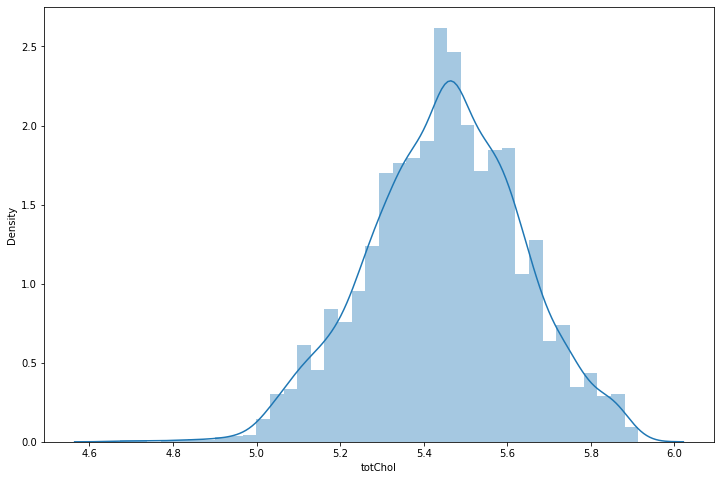

In [ ]:
# Transform Your data
# Visualise totChol distribution after log-transformation
sns.distplot(np.log(cvs_df['totChol']))

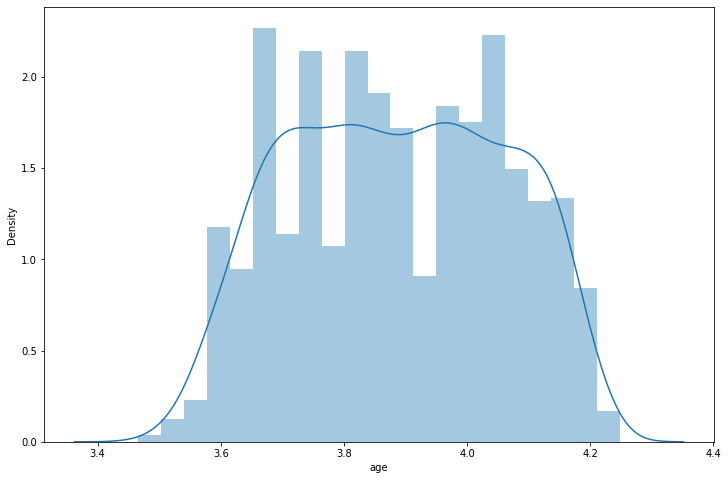

In [ ]:
# Transform Your data
# Visualise age distribution after log-transformation
sns.distplot(np.log(cvs_df['age']))

In [ ]:
# Log-Transforming totChol and age column
cvs_df['totChol']=np.log(cvs_df['totChol'])
cvs_df['age']=np.log(cvs_df['age'])

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Some of the features needed to be transformed to make it gaussian(normal) distribution to have more accurate predictions and that are totChol and age.

We have applied non-linear transformations i.e log-transformation on totChol and age features to make them gaussian distribution.
Age feature is transformed to gaussian approximately.

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As per my knowledge, for this dataset dimensionality reduction is not required.

For this dataset, there are not many features but some 10 to 15 features and most of them are important in predicting the sales. I have 
identified those highly correlated variables and combined them to create new features and variables which are not related to the target variable and dropped them.

In large datasets, very often the variables are highly correlated. The very purpose of applying dimension reduction techniques like PCA is to identify those highly correlated variables or variables which are not related to the target variable and drop them out from further analysis.

Having highly correlated variables leads to overfitting and hence the accuracy of the model will suffer. 

So, it is good to do the dimensionality reduction wherever possible but here it is not required.

### 7. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
# Percentage distribution of classes in the target variable i.e Ten Year CHD
cvs_df['TenYearCHD'].value_counts()/len(cvs_df)*100

0    84.857482
1    15.142518
Name: TenYearCHD, dtype: float64

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different:
If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

We can see that there is clearly a class imbalance condition having nearly 85/15 ratio i.e 85 % data points are of 0 class(not having risk of CHD) and 15 % data points are of 1 class(having risk of CHD).

Let's Resample the dataset to over come this imbalance. We will apply SMOTE (Synthetic Minority Oversampling Technique) to resample the data. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Creating the dataset with all independent variables 
X = cvs_df.iloc[:,:-1]

# Creating the dataset with the dependent variable 
y = cvs_df.iloc[:,-1]


# Applying SMOTE technique on predictors and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(cvs_df))
print('Resampled dataset shape', len(y_smote))




Original dataset shape 3368
Resampled dataset shape 5716


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) for balanced the 85:15 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE. 

To address this disparity, balancing schemes that augment the data to make it more balanced before training the classifier were proposed. Oversampling the minority class by duplicating minority samples or undersampling the majority class is the simplest balancing method. 

The idea of incorporating synthetic minority samples into tabular data was first proposed in SMOTE, where synthetic minority samples are generated by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm. 

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

That's why for lots of advantages, I have used SMOTE technique for balancing the dataset.


### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Splitting the smote dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.3, random_state = 42)

##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle.

However, I have used 70/30 ratio i.e 70 % data as training dataset and remaining 30 % as testing dataset because we have less data i.e less number of rows (only 3368 rows) to reduce variance in testing data.

### 9. Data Scaling

In [ ]:
# Scaling your data
# Applying Standard Scaling technique to train and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[list(x_train.columns)] = scaler.fit_transform(x_train[list(x_train.columns)])
x_test[list(x_test.columns)] = scaler.transform(x_test[list(x_test.columns)])

##### Which method have you used to scale you data and why?

**Standardization** 

Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.

The ultimate goal is to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently on each feature.

It scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

I have used to Standardization i.e. StandardScaler() to scale all the features of the dataset except the target feature (Ten Year CHD). As totChol and age features are transformed to gaussian distribution, we are using standardization.

## ***7. ML Model Implementation***

### ML Model - 1 Implementing K-Nearest Neighbours Classifier

In [ ]:
# Importing evaluation metrics for classification problem
from sklearn.metrics import precision_score,recall_score

from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

In [ ]:
# ML Model - 1 Implementation



# Setup arrays to store train and test accuracies
neighbors = np.arange(1,30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):

    # Setup a knn classifier with k neighbors
    kNN = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the Algorithm
    kNN.fit(x_train, y_train)

    # Predict on the model
    y_pred_=kNN.predict(x_test)

    # Compute accuracy on the train set
    train_accuracy[i] = kNN.score(x_train, y_train)

    # Compute accuracy on the test set
    test_accuracy[i] = kNN.score(x_test, y_test)

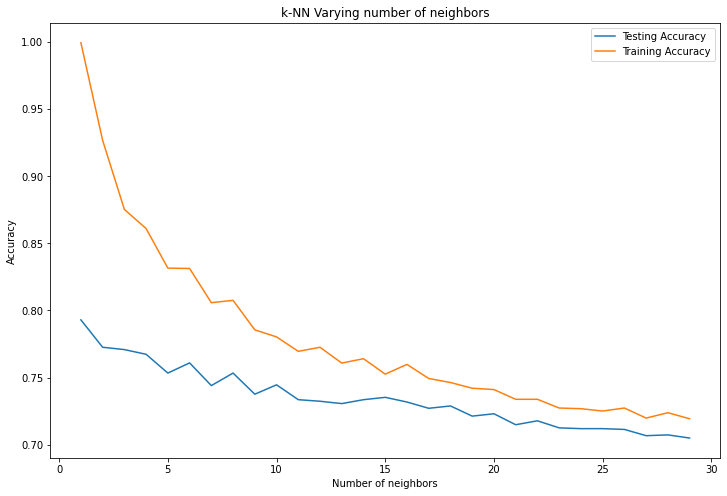

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Creating a function model_implement_smote_data
def model_implement_smote_data(model,x_train,x_test,y_train,y_test):
  ''' This function is used to fit the algorithm on smote train data and predict on the smote test data and show evaluation metrics'''
 
  # Fit the Algorithm
  model.fit(x_train,y_train)

  # Predict on the model
  y_pred=model.predict(x_test)

  # Showing evaluation metrics(Confusion matrix, Precision, Recall, AUC-ROC)
  print('Confusion matrix : \n' , confusion_matrix(y_test,y_pred))

  print('\nPrecision Score : ' ,precision_score(y_test,y_pred),'\n')

  print('Recall Score : ' ,recall_score(y_test,y_pred),'\n')
  
  print('ROC-AUC score :',roc_auc_score(y_test, y_pred),'\n')

  
  # Plotting the ROC curve
  y_pred_proba = model.predict_proba(x_test)[:,1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='model')
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.title(f'{model} ROC curve')
  plt.show()

  # Showing classification report
  print('\n Classification report : \n' ,classification_report(y_test,y_pred))

  

Confusion matrix : 
 [[636 224]
 [131 724]]

Precision Score :  0.7637130801687764 

Recall Score :  0.8467836257309942 

ROC-AUC score : 0.7931592547259623 



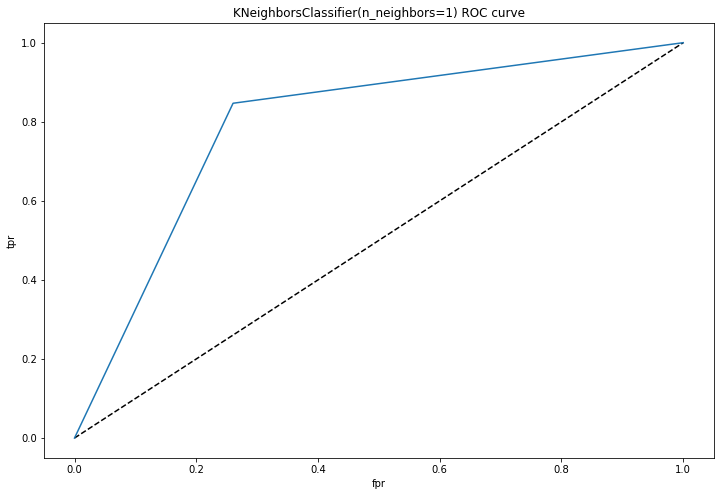


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       860
           1       0.76      0.85      0.80       855

    accuracy                           0.79      1715
   macro avg       0.80      0.79      0.79      1715
weighted avg       0.80      0.79      0.79      1715



In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=1)

# Applying the function for predicting on smote test data and find evaluation metrics

model_implement_smote_data(knn,x_train,x_test,y_train,y_test)

In [ ]:
# Splitting the actual dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Scaling your data
# Applying Standard Scaling technique to train and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[list(X_train.columns)] = scaler.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = scaler.transform(X_test[list(X_test.columns)])

In [ ]:
# Creating a function model_implement_actual_data
def model_implement_actual_data(model,x_test,y_test):
  ''' This function is used to fit the algorithm on smote train data and predict on the actual test data and show evaluation metrics'''
 
  # Predict on the model
  y_pred=model.predict(x_test)

  # Showing evaluation metrics(Confusion matrix, Precision, Recall, AUC-ROC)
  print('Confusion matrix :\n',confusion_matrix(y_test,y_pred))
  print('\n Precision Score : ' ,precision_score(y_test,y_pred),'\n')

  print('Recall Score : ' ,recall_score(y_test,y_pred),'\n')

  print('ROC-AUC score:',roc_auc_score(y_test, y_pred),'\n')
  
  # Plotting the ROC curve
  y_pred_proba = model.predict_proba(x_test)[:,1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='model')
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.title(f'{model} ROC curve')
  plt.show()

  # Showing classification report
  print('\n Classification report : \n' ,classification_report(y_test,y_pred))

  

In [ ]:
# Value counts of target variable for testing data
Y_test.value_counts()

0    846
1    165
Name: TenYearCHD, dtype: int64

Confusion matrix :
 [[673 173]
 [ 18 147]]

 Precision Score :  0.459375 

Recall Score :  0.8909090909090909 

ROC-AUC score: 0.8432086825703846 



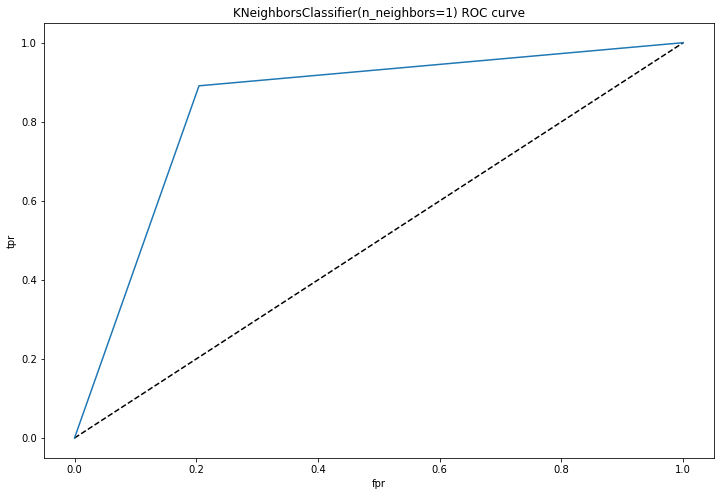


 Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.80      0.88       846
           1       0.46      0.89      0.61       165

    accuracy                           0.81      1011
   macro avg       0.72      0.84      0.74      1011
weighted avg       0.89      0.81      0.83      1011



In [ ]:
# Applying the function for predicting on actual test data and find evaluation metrics

model_implement_actual_data(knn,X_test,Y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used K Nearest Neighbours (kNN) algorithm to predict whether patient is having a risk of CHD or not.

On balanced data got from Smote technique, I applied kNN algorithm on training data for a range of k values from 1 to 30 and got that for the testing data, highest AUC-ROC value is for the k value of 1 (k=1). 

I applied kNN for k = 1 on actual testing data and got following results :

**For the  actual testing data**, 

ROC-AUC score: 0.84

Precision Score :  0.46

Recall Score :  0.89

f1-score : 0.61


I have got good results, but these results are not generalised and are good for this test data. We want to build the model for any future data so improving by using hyperparameter tuning. 

In [ ]:
# Creating an empty dataframe
metrics_df=pd.DataFrame()

# Creating a function eval_metric_chart
def eval_metric_chart(model_name,model,x_test,y_test):
  ''' This function is used to make Evaluation score chart showing model name and evaluation metrics in each row '''

  # Defining variable as global
  global metrics_df

  # Making Predictions
  y_pred=model.predict(x_test)

  # Finding evaluation metrics(Precision, Recall, AUC-ROC, F-score)
  roc_auc=round(roc_auc_score(y_test, y_pred),2)

  recall=round(recall_score(y_test,y_pred),2)

  precision= round(precision_score(y_test,y_pred),2)

  F_Score = round((2 * precision * recall) / (precision + recall),2)

  # Columns needed to compare metrics
  # 2 lists created
  columns = ['Model_Name','ROC_AUC','Recall','Precision','F_Score']
  metrics = [{model_name}, roc_auc,recall,precision,F_Score]

  # Making a dictionary of 2 lists
  metrics_dict = dict(zip(columns,metrics))

  # Appending dictionary to dataframe
  metrics_df=metrics_df.append(metrics_dict,ignore_index=True)

  return metrics_df

In [ ]:
# Visualizing evaluation Metric Score chart
# Applying function to update Evaluation score chart
eval_metric_chart('kNN_Model',knn,X_test,Y_test)
  

,Model_Name,ROC_AUC,Recall,Precision,F_Score
0,{kNN_Model},0.84,0.89,0.46,0.61


#### 2. Cross- Validation & Hyperparameter Tuning

Confusion matrix : 
 [[592 268]
 [125 730]]

Precision Score :  0.7314629258517034 

Recall Score :  0.8538011695906432 

ROC-AUC score : 0.7710866313069495 



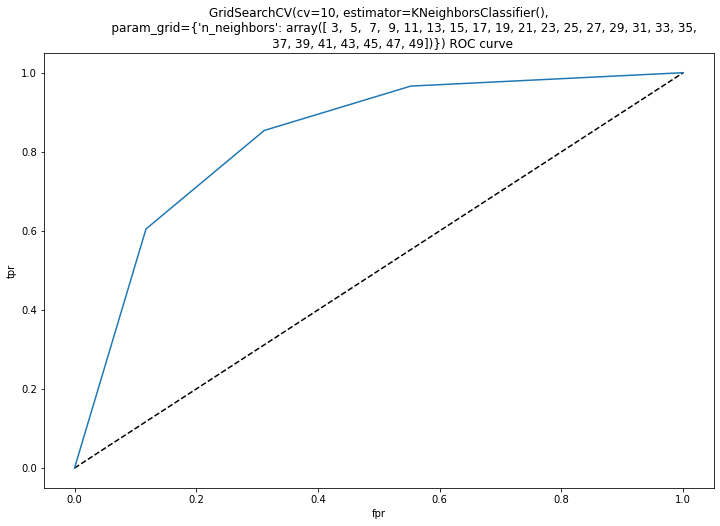


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.69      0.75       860
           1       0.73      0.85      0.79       855

    accuracy                           0.77      1715
   macro avg       0.78      0.77      0.77      1715
weighted avg       0.78      0.77      0.77      1715

The best values of hyperparameters is found out to be : {'n_neighbors': 3}


In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Predict on the model
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(3,50,2)}

# Setup a knn classifier with k neighbors and parameters
knn_ = KNeighborsClassifier()
knn_hyp= GridSearchCV(knn_,param_grid,cv=10)

# Applying the function for predicting on smote test data and find evaluation metrics
model_implement_smote_data(knn_hyp,x_train,x_test,y_train,y_test)

# Showing Best Parameters
print("The best values of hyperparameters is found out to be :" ,knn_hyp.best_params_)

Confusion matrix :
 [[588 258]
 [ 29 136]]

 Precision Score :  0.34517766497461927 

Recall Score :  0.8242424242424242 

ROC-AUC score: 0.759638942617666 



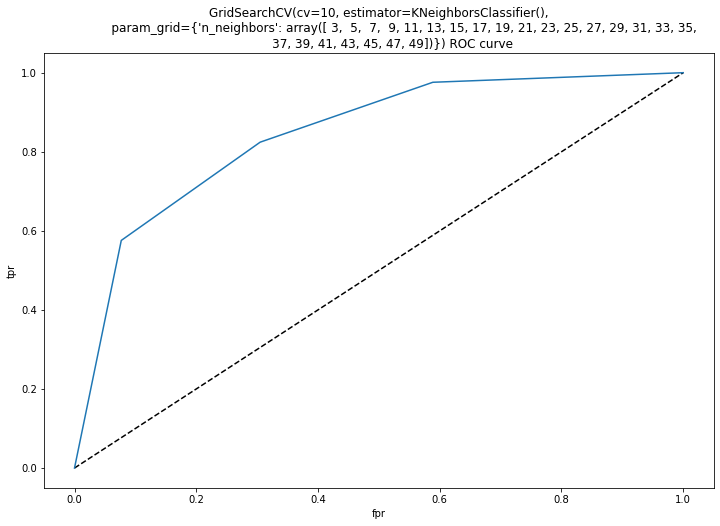


 Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.70      0.80       846
           1       0.35      0.82      0.49       165

    accuracy                           0.72      1011
   macro avg       0.65      0.76      0.65      1011
weighted avg       0.85      0.72      0.75      1011



In [ ]:
# Applying the function for predicting on actual test data and find evaluation metrics
model_implement_actual_data(knn_hyp,X_test,Y_test)


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I have used Grid Search CV as hyperparameter optimization technique and got best parameter as k = 3 and for this following are the results : 

**For the actual testing data**, 

ROC-AUC score: 0.76

Precision Score :  0.35

Recall Score :  0.82

f1-score : 0.49



In [ ]:
# Visualizing evaluation Metric Score chart
# Applying function to update Evaluation score chart
eval_metric_chart('kNN_Hyperparameter_tuned',knn_hyp,X_test,Y_test)

,Model_Name,ROC_AUC,Recall,Precision,F_Score
0,{kNN_Model},0.84,0.89,0.46,0.61
1,{kNN_Hyperparameter_tuned},0.76,0.82,0.35,0.49


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The very simple metric to measure classification is basic accuracy i.e. ratio of correct predictions to the total number of samples in dataset. However, in the case of imbalanced classes this metric can be misguiding, as high metrics doesn’t show prediction capacity for the minority class. You may have 99% accuracy but still lousy prediction capacity on the class you are truly interested in (i.e. anomaly detection where anomalies are rare classes in a dataset). To gain more understanding for the current model predictive ability let’s start from the four possible cases of sample to be classified

True Positive (TP)— sample’s label is positive and it is classified as positive.

True Negative (TN) — sample’s label is negative and it is classified as negative.

False Positive (FP)— sample’s label is negative, but it is classified as positive.

False Negative (FN)— sample’s label is positive, but it is classified as negative.

Based on these four quantities we can derive following metrics for imbalanced classes :

**Recall (True Positive Rate or Sensitivity)**

Recall metric shows how many relevant samples are selected, which means how well our model can predict all the interested samples in our dataset.

Recall = TP / ( TP + FN )

**Precision**

Precision metric tells us how many predicted samples are relevant i.e. our mistakes into classifying sample as a correct one if it’s not true.

Precision = TP / ( TP + FP )

**F1-score**

F1 metric is the harmonic average of the precision and recall and calculated as

F1-score = ( 2 * Precision * Recall ) / ( Precision + Recall )

This metric is a good choice for the imbalanced classification scenario. The range of F1 is in [0, 1], where 1 is perfect classification and 0 is total failure.


**ROC-AUC **

ROC stands for Receiver Operating Characteristic and initially was designed as metric for distinguishing noise from not noise. ROC is created by plotting the fraction of True Positive Rate (on the y axis) vs the False Positive Rate (on the x axis). The ROC-AUC metric is showed an area under the curve obtained by ROC curve. AUC is a common abbreviation for Area Under the Receiver Operating Characteristic Curve (ROC AUC). It’s a metric used to assess the performance of classification machine learning models.

The ROC is a graph which maps the relationship between true positive rate (TPR) and the false positive rate (FPR), showing the TPR that we can expect to receive for a given trade-off with FPR. The AUC score is the area under this ROC curve, meaning that the resulting score represents in broad terms the model's ability to predict classes correctly.

### ML Model - 2 Implementing Support Vector Classifier

In [ ]:
# ML Model - 2 Implementation



# Applying SVC for different kernels
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):

  # Setup a SVC classifier with required parameters for handling imbalance
  # We can add class_weight='balanced' to add penalize mistake
  svc_classifier = SVC(class_weight='balanced', probability=True,kernel = kernels[i])

  # Fit the Algorithm
  svc_classifier.fit(x_train, y_train)
  y_pred_= svc_classifier.predict(x_test)
  
  # Compute accuracy on the test set
  svc_scores.append(round(svc_classifier.score(x_test,y_test),2))

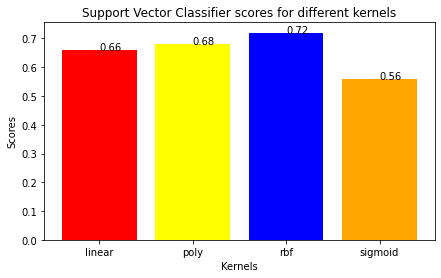

In [ ]:
# Plotting accuracy scores for each kernel
plt.figure(figsize=(7,4))
plt.bar(kernels, svc_scores,color=['red', 'yellow', 'blue', 'orange'])
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.show()

Confusion matrix : 
 [[576 284]
 [203 652]]

Precision Score :  0.6965811965811965 

Recall Score :  0.7625730994152047 

ROC-AUC score : 0.7161702706378349 



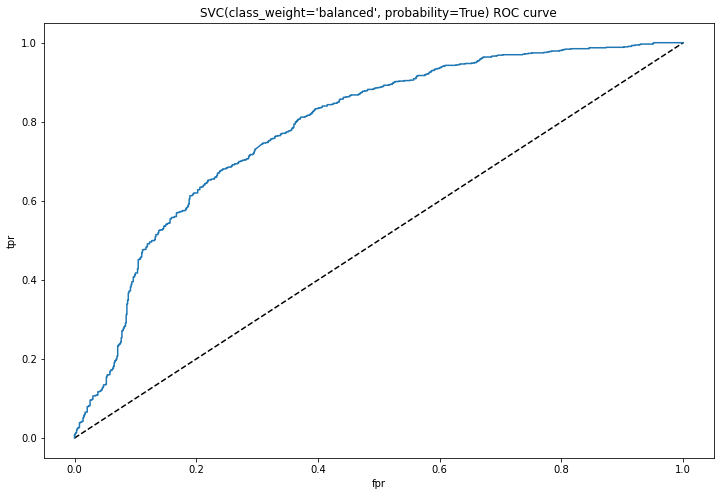


 Classification report : 
               precision    recall  f1-score   support

           0       0.74      0.67      0.70       860
           1       0.70      0.76      0.73       855

    accuracy                           0.72      1715
   macro avg       0.72      0.72      0.72      1715
weighted avg       0.72      0.72      0.72      1715



In [ ]:
# Setup a SVC classifier with required parameters for handling imbalance
# We can add class_weight='balanced' to add penalize mistake

svc_model = SVC(kernel='rbf',class_weight='balanced', probability=True)

# Applying the function for predicting on smote test data and find evaluation metrics
model_implement_smote_data(svc_model,x_train,x_test,y_train,y_test)


Confusion matrix :
 [[472 374]
 [ 37 128]]

 Precision Score :  0.2549800796812749 

Recall Score :  0.7757575757575758 

ROC-AUC score: 0.6668385987534923 



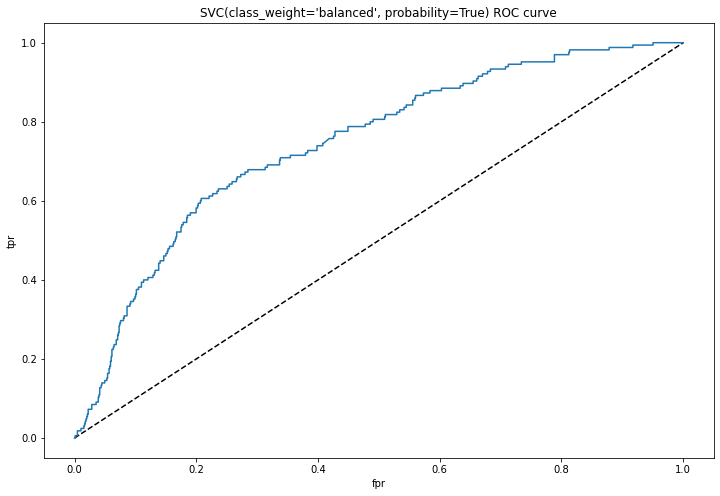


 Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.56      0.70       846
           1       0.25      0.78      0.38       165

    accuracy                           0.59      1011
   macro avg       0.59      0.67      0.54      1011
weighted avg       0.82      0.59      0.65      1011



In [ ]:
# Applying the function for predicting on actual test data and find evaluation metrics
model_implement_actual_data(svc_model,X_test,Y_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used Support Vector Classifier(SVC) to predict whether patient is having a risk of CHD or not.

On balanced data got from Smote technique, I applied SVC algorithm on training data for different kernels and got that for the testing data, highest AUC-ROC value is for the rbf kernel (roc_auc_score=0.82). 

I applied SVC on actual testing data and got following results :

**For the  actual testing data**, 

ROC-AUC score: 0.66

Precision Score :  0.25

Recall Score :  0.78

f1-score : 0.38 


I have not got good results, so improving by using hyperparameter tuning.  





In [ ]:
# Visualizing evaluation Metric Score chart
# Applying function to update Evaluation score chart
eval_metric_chart('SVC_model',svc_model,X_test,Y_test)

,Model_Name,ROC_AUC,Recall,Precision,F_Score
0,{kNN_Model},0.84,0.89,0.46,0.61
1,{kNN_Hyperparameter_tuned},0.76,0.82,0.35,0.49
2,{SVC_model},0.67,0.78,0.25,0.38


#### 2. Cross- Validation & Hyperparameter Tuning

Confusion matrix : 
 [[608 252]
 [144 711]]

Precision Score :  0.7383177570093458 

Recall Score :  0.8315789473684211 

ROC-AUC score : 0.7692778457772337 



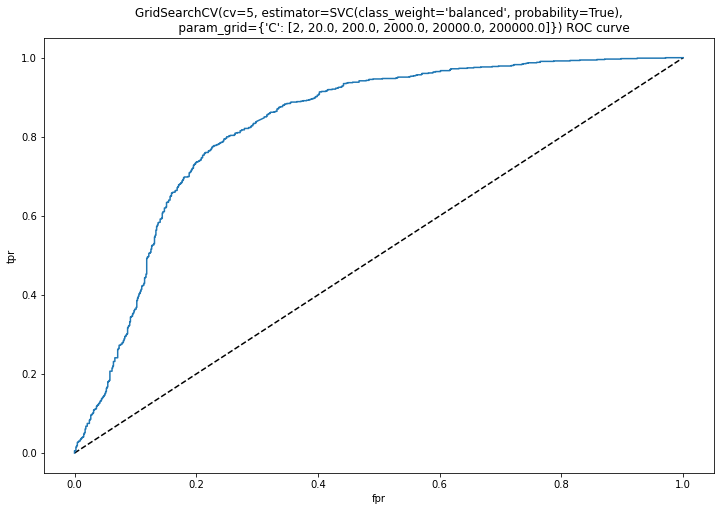


 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.71      0.75       860
           1       0.74      0.83      0.78       855

    accuracy                           0.77      1715
   macro avg       0.77      0.77      0.77      1715
weighted avg       0.77      0.77      0.77      1715

The best values of hyperparameters are found out to be : {'C': 2000.0}


In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# In case of classifier like knn the parameter to be tuned is C value(Cost Parameter)
param_grid = {'C':[2,2e1,2e2,2e3,2e4,2e5]}

# Setup a SVC classifier with required parameters for handling imbalance
# We can add class_weight='balanced' to add penalize mistake
svc_ = SVC(kernel='rbf',class_weight='balanced', probability=True)
svc_hyp= GridSearchCV(svc_,param_grid,cv=5)


# Applying the function for predicting on smote test data and find evaluation metrics
model_implement_smote_data(svc_hyp,x_train,x_test,y_train,y_test)

# showing best parameters
print("The best values of hyperparameters are found out to be :" ,svc_hyp.best_params_)

Confusion matrix :
 [[587 259]
 [ 39 126]]

 Precision Score :  0.32727272727272727 

Recall Score :  0.7636363636363637 

ROC-AUC score: 0.7287448957661724 



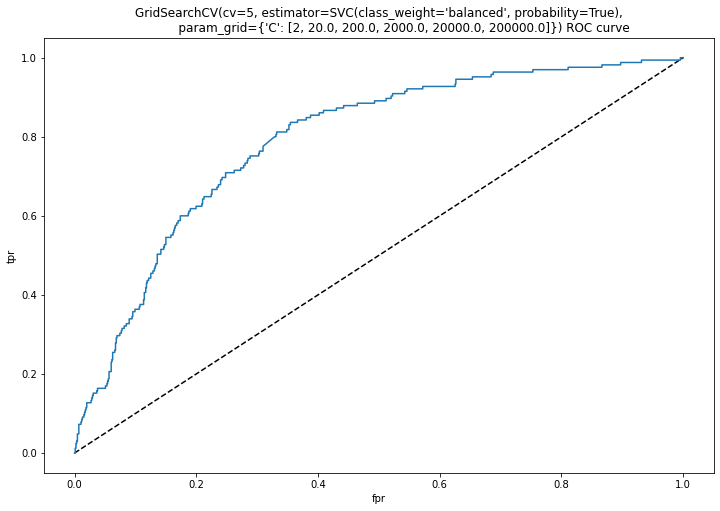


 Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.69      0.80       846
           1       0.33      0.76      0.46       165

    accuracy                           0.71      1011
   macro avg       0.63      0.73      0.63      1011
weighted avg       0.84      0.71      0.74      1011



In [ ]:
# Applying the function for predicting on actual test data and find evaluation metrics
model_implement_actual_data(svc_hyp,X_test,Y_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I have used Grid Search CV as hyperparameter optimization technique and got best parameter as C = 2000  and for this following are the results : 

**For the actual testing data**, 

ROC-AUC score: 0.73

Precision Score :  0.33

Recall Score :  0.76

f1-score : 0.46







In [ ]:
# Visualizing evaluation Metric Score chart
# Applying function to update Evaluation score chart
eval_metric_chart('SVC_Hyperparameter_tuned',svc_hyp,X_test,Y_test)

,Model_Name,ROC_AUC,Recall,Precision,F_Score
0,{kNN_Model},0.84,0.89,0.46,0.61
1,{kNN_Hyperparameter_tuned},0.76,0.82,0.35,0.49
2,{SVC_model},0.67,0.78,0.25,0.38
3,{SVC_Hyperparameter_tuned},0.73,0.76,0.33,0.46


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The very simple metric to measure classification is basic accuracy i.e. ratio of correct predictions to the total number of samples in dataset. However, in the case of imbalanced classes this metric can be misguiding, as high metrics doesn’t show prediction capacity for the minority class. You may have 99% accuracy but still lousy prediction capacity on the class you are truly interested in (i.e. anomaly detection where anomalies are rare classes in a dataset). To gain more understanding for the current model predictive ability let’s start from the four possible cases of sample to be classified

True Positive (TP)— sample’s label is positive and it is classified as positive.

True Negative (TN) — sample’s label is negative and it is classified as negative.

False Positive (FP)— sample’s label is negative, but it is classified as positive.

False Negative (FN)— sample’s label is positive, but it is classified as negative.

Based on these four quantities we can derive following metrics for imbalanced classes :

**Recall (True Positive Rate or Sensitivity)**

Recall metric shows how many relevant samples are selected, which means how well our model can predict all the interested samples in our dataset.

Recall = TP / ( TP + FN )

**Precision**

Precision metric tells us how many predicted samples are relevant i.e. our mistakes into classifying sample as a correct one if it’s not true.

Precision = TP / ( TP + FP )

**F1-score**

F1 metric is the harmonic average of the precision and recall and calculated as

F1-score = ( 2 * Precision * Recall ) / ( Precision + Recall )

This metric is a good choice for the imbalanced classification scenario. The range of F1 is in [0, 1], where 1 is perfect classification and 0 is total failure.


**ROC-AUC **

ROC stands for Receiver Operating Characteristic and initially was designed as metric for distinguishing noise from not noise. ROC is created by plotting the fraction of True Positive Rate (on the y axis) vs the False Positive Rate (on the x axis). The ROC-AUC metric is showed an area under the curve obtained by ROC curve. AUC is a common abbreviation for Area Under the Receiver Operating Characteristic Curve (ROC AUC). It’s a metric used to assess the performance of classification machine learning models.

The ROC is a graph which maps the relationship between true positive rate (TPR) and the false positive rate (FPR), showing the TPR that we can expect to receive for a given trade-off with FPR. The AUC score is the area under this ROC curve, meaning that the resulting score represents in broad terms the model's ability to predict classes correctly.

### ML Model - 3 Implementing Random Forest Classifier

Confusion matrix : 
 [[696 164]
 [146 709]]

Precision Score :  0.8121420389461627 

Recall Score :  0.8292397660818713 

ROC-AUC score : 0.8192710458316333 



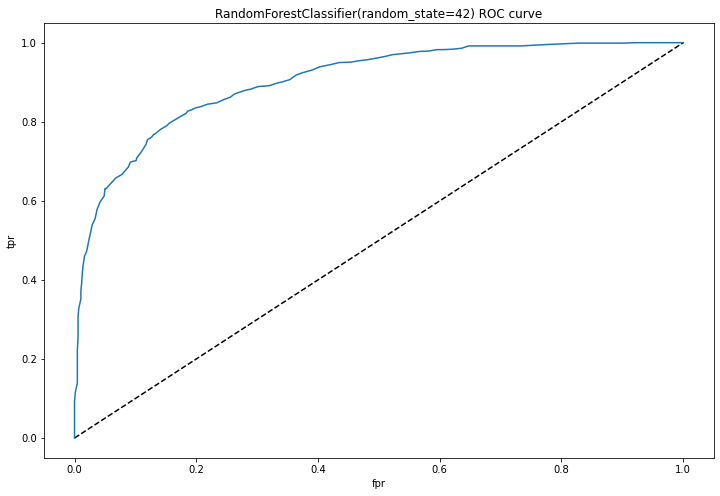


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       860
           1       0.81      0.83      0.82       855

    accuracy                           0.82      1715
   macro avg       0.82      0.82      0.82      1715
weighted avg       0.82      0.82      0.82      1715



In [ ]:
# ML Model - 3 Implementation

# Setup a RFC classifier 
rfc=RandomForestClassifier(random_state=42)

# Applying the function for predicting on smote test data and find evaluation metrics
model_implement_smote_data(rfc,x_train,x_test,y_train,y_test)

Confusion matrix :
 [[585 261]
 [ 33 132]]

 Precision Score :  0.33587786259541985 

Recall Score :  0.8 

ROC-AUC score: 0.7457446808510637 



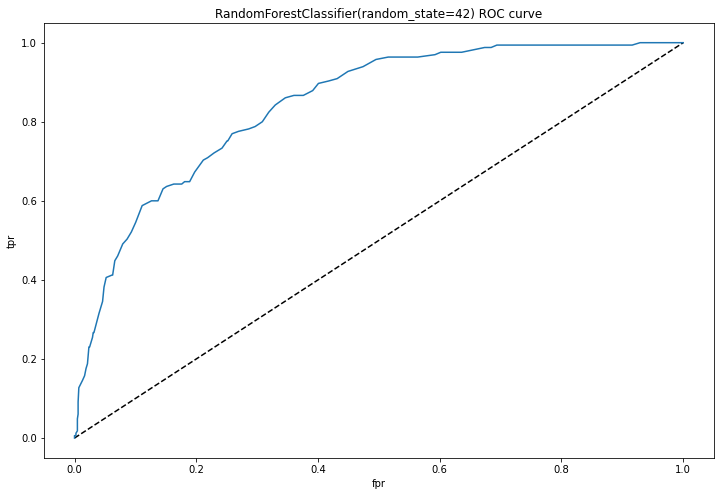


 Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.69      0.80       846
           1       0.34      0.80      0.47       165

    accuracy                           0.71      1011
   macro avg       0.64      0.75      0.64      1011
weighted avg       0.85      0.71      0.75      1011



In [ ]:
# Applying the function for predicting on actual test data and find evaluation metrics
model_implement_actual_data(rfc,X_test,Y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


I have used Random Forest Classifier (RFC) to predict whether patient is having a risk of CHD or not.

On balanced data got from Smote technique, I fitted RFC algorithm on training data and predicted on the actual testing data, got following results :

**For the  actual testing data**, 

ROC-AUC score: 0.75

Precision Score :  0.34

Recall Score :  0.80

f1-score : 0.47


I got quite acceptable results and now improving by using hyperparameter tuning.  





In [ ]:
# Visualizing evaluation Metric Score chart
# Applying function to update Evaluation score chart
eval_metric_chart('RFC_Model',rfc,X_test,Y_test)

,Model_Name,ROC_AUC,Recall,Precision,F_Score
0,{kNN_Model},0.84,0.89,0.46,0.61
1,{kNN_Hyperparameter_tuned},0.76,0.82,0.35,0.49
2,{SVC_model},0.67,0.78,0.25,0.38
3,{SVC_Hyperparameter_tuned},0.73,0.76,0.33,0.46
4,{RFC_Model},0.75,0.80,0.34,0.48


#### 2. Cross- Validation & Hyperparameter Tuning

Confusion matrix : 
 [[709 151]
 [160 695]]

Precision Score :  0.8215130023640662 

Recall Score :  0.8128654970760234 

ROC-AUC score : 0.8186420508635931 



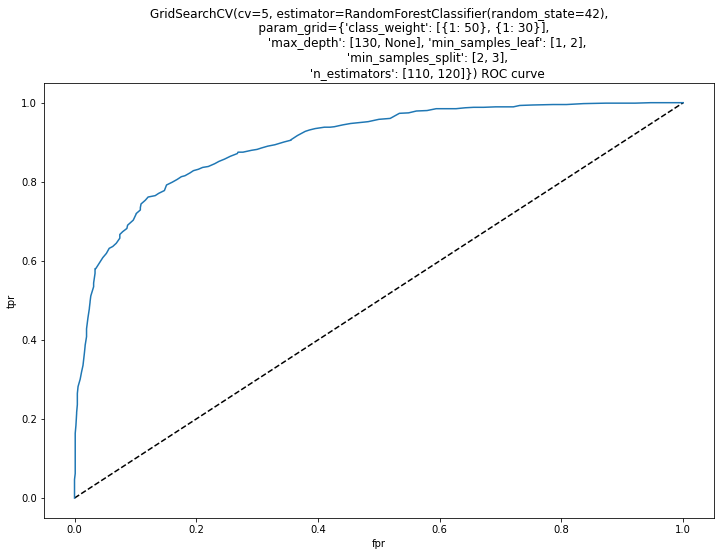


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       860
           1       0.82      0.81      0.82       855

    accuracy                           0.82      1715
   macro avg       0.82      0.82      0.82      1715
weighted avg       0.82      0.82      0.82      1715

The best values of hyperparameters are found out to be : {'class_weight': {1: 50}, 'max_depth': 130, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110}


In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Setup a RFC classifier with required parameters
rfc_= RandomForestClassifier(random_state=42)
param_dict_ = {'max_depth' : [130,None],
                'min_samples_leaf': [1,2],
                'min_samples_split' : [2,3],
                'n_estimators': [110,120],
                'class_weight': [{1:a} for a in [50,30]]}

rfc_hyp = GridSearchCV(rfc_,param_dict_ , cv = 5)


# Applying the function for predicting on smote test data and find evaluation metrics
model_implement_smote_data(rfc_hyp,x_train,x_test,y_train,y_test)

# Showing best parameters
print("The best values of hyperparameters are found out to be :" ,rfc_hyp.best_params_)


Confusion matrix :
 [[640 206]
 [ 46 119]]

 Precision Score :  0.36615384615384616 

Recall Score :  0.7212121212121212 

ROC-AUC score: 0.738856651622609 



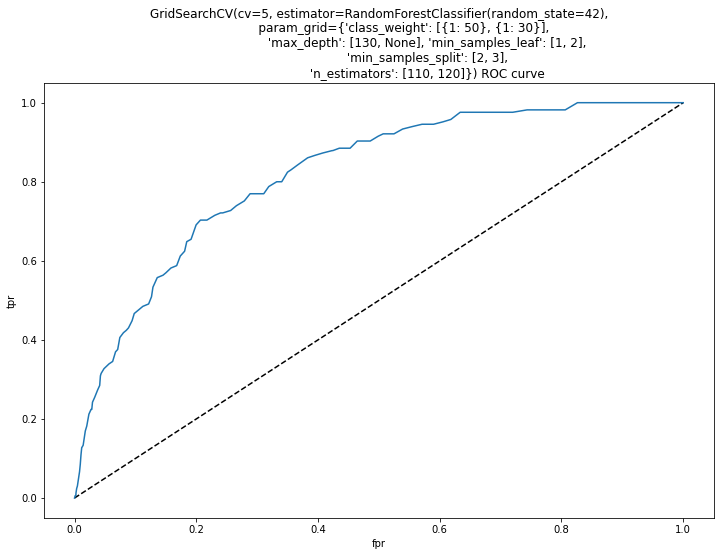


 Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.76      0.84       846
           1       0.37      0.72      0.49       165

    accuracy                           0.75      1011
   macro avg       0.65      0.74      0.66      1011
weighted avg       0.84      0.75      0.78      1011



In [ ]:
# Applying the function for predicting on actual test data and find evaluation metrics
model_implement_actual_data(rfc_hyp,X_test,Y_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I have used Grid Search CV as hyperparameter optimization technique and got best parameter as 

max_depth : 130, min_samples_leaf : 1, min_samples_split : 2,   n_estimators : 110, class_weight : {1 : 50} and for this following are the results : 


**For the  actual testing data**, 

ROC-AUC score: 0.74

Precision Score :  0.37

Recall Score :  0.72

f1-score : 0.49


 




In [ ]:
# Visualizing evaluation Metric Score chart
# Applying function to update Evaluation score chart
eval_metric_chart('RFC_Hyperparameter_tuned',rfc_hyp,X_test,Y_test)

,Model_Name,ROC_AUC,Recall,Precision,F_Score
0,{kNN_Model},0.84,0.89,0.46,0.61
1,{kNN_Hyperparameter_tuned},0.76,0.82,0.35,0.49
2,{SVC_model},0.67,0.78,0.25,0.38
3,{SVC_Hyperparameter_tuned},0.73,0.76,0.33,0.46
4,{RFC_Model},0.75,0.80,0.34,0.48
5,{RFC_Hyperparameter_tuned},0.74,0.72,0.37,0.49


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The very simple metric to measure classification is basic accuracy i.e. ratio of correct predictions to the total number of samples in dataset. However, in the case of imbalanced classes this metric can be misguiding, as high metrics doesn’t show prediction capacity for the minority class. You may have 99% accuracy but still lousy prediction capacity on the class you are truly interested in (i.e. anomaly detection where anomalies are rare classes in a dataset). To gain more understanding for the current model predictive ability let’s start from the four possible cases of sample to be classified

True Positive (TP)— sample’s label is positive and it is classified as positive.

True Negative (TN) — sample’s label is negative and it is classified as negative.

False Positive (FP)— sample’s label is negative, but it is classified as positive.

False Negative (FN)— sample’s label is positive, but it is classified as negative.

Based on these four quantities we can derive following metrics for imbalanced classes :

**Recall (True Positive Rate or Sensitivity)**

Recall metric shows how many relevant samples are selected, which means how well our model can predict all the interested samples in our dataset.

Recall = TP / ( TP + FN )

**Precision**

Precision metric tells us how many predicted samples are relevant i.e. our mistakes into classifying sample as a correct one if it’s not true.

Precision = TP / ( TP + FP )

**F1-score**

F1 metric is the harmonic average of the precision and recall and calculated as

F1-score = ( 2 * Precision * Recall ) / ( Precision + Recall )

This metric is a good choice for the imbalanced classification scenario. The range of F1 is in [0, 1], where 1 is perfect classification and 0 is total failure.


**ROC-AUC **

ROC stands for Receiver Operating Characteristic and initially was designed as metric for distinguishing noise from not noise. ROC is created by plotting the fraction of True Positive Rate (on the y axis) vs the False Positive Rate (on the x axis). The ROC-AUC metric is showed an area under the curve obtained by ROC curve. AUC is a common abbreviation for Area Under the Receiver Operating Characteristic Curve (ROC AUC). It’s a metric used to assess the performance of classification machine learning models.

The ROC is a graph which maps the relationship between true positive rate (TPR) and the false positive rate (FPR), showing the TPR that we can expect to receive for a given trade-off with FPR. The AUC score is the area under this ROC curve, meaning that the resulting score represents in broad terms the model's ability to predict classes correctly.

## 1. Which Evaluation metrics did you consider for a positive business impact and why?

The very simple metric to measure classification is basic accuracy i.e. ratio of correct predictions to the total number of samples in dataset. However, in the case of imbalanced classes this metric can be misguiding, as high metrics doesn’t show prediction capacity for the minority class. You may have 99% accuracy but still lousy prediction capacity on the class you are truly interested in (i.e. anomaly detection where anomalies are rare classes in a dataset). To gain more understanding for the current model predictive ability let’s start from the four possible cases of sample to be classified

True Positive (TP)— sample’s label is positive and it is classified as positive.

True Negative (TN) — sample’s label is negative and it is classified as negative.

False Positive (FP)— sample’s label is negative, but it is classified as positive.

False Negative (FN)— sample’s label is positive, but it is classified as negative.

Based on these four quantities we can derive following metrics for imbalanced classes :

**Recall (True Positive Rate or Sensitivity)**

Recall metric shows how many relevant samples are selected, which means how well our model can predict all the interested samples in our dataset.

Recall = TP / ( TP + FN )

**Precision**

Precision metric tells us how many predicted samples are relevant i.e. our mistakes into classifying sample as a correct one if it’s not true.

Precision = TP / ( TP + FP )

**F1-score**

F1 metric is the harmonic average of the precision and recall and calculated as

F1-score = ( 2 * Precision * Recall ) / ( Precision + Recall )

This metric is a good choice for the imbalanced classification scenario. The range of F1 is in [0, 1], where 1 is perfect classification and 0 is total failure.


**ROC-AUC **

ROC stands for Receiver Operating Characteristic and initially was designed as metric for distinguishing noise from not noise. ROC is created by plotting the fraction of True Positive Rate (on the y axis) vs the False Positive Rate (on the x axis). The ROC-AUC metric is showed an area under the curve obtained by ROC curve. AUC is a common abbreviation for Area Under the Receiver Operating Characteristic Curve (ROC AUC). It’s a metric used to assess the performance of classification machine learning models.

The ROC is a graph which maps the relationship between true positive rate (TPR) and the false positive rate (FPR), showing the TPR that we can expect to receive for a given trade-off with FPR. The AUC score is the area under this ROC curve, meaning that the resulting score represents in broad terms the model's ability to predict classes correctly.


**Evaluation Metrics Considered**

Although widely used, the ROC AUC is not without problems. For imbalanced classification with a severe skew and few examples of the minority class, the ROC AUC can be misleading. This is because a small number of correct or incorrect predictions can result in a large change in the ROC Curve or ROC AUC score.

The F1 score is defined as the harmonic mean of precision and recall.The F1 score becomes especially valuable when working on classification models in which your data set is imbalanced.

You have seen that the F1 score combines precision and recall into a single metric. It keeps the balance between Precision and Recall. Also this makes it easy to use in grid search or automated optimization.

We can infer about Precision and Recall values from the F1 score values as follows :

1) When F1 score is low, both Precision and Recall are low.

2) When F1 score is high, both Precision and Recall are high.

3) When F1 score is moderate, one of them is high and other is low.

So, F1 score is the best evaluation metric to consider for an imbalanced classification problem.

## 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have chosen K-Nearest Neighbours with hyperparameter tuned by Grid Search CV as my final model.

Both Random Forest Classifier(RFC) and K-Nearest Neighbours(K-NN) hyperparameter tuned were giving same F-score as 0.49 but here, the problem is identifying patients which are at risk of Coronary Heart Disease(CHD) so, correctly classifying patients which are at risk are more important. This means False Negatives are more costly than False Positives, therefore Recall is more important evaluation metric than Precision. 

Recall is more for K-NN as compared to that for RFC so, I have taken K-NN as my final model.

K-NN is a supervised machine learning algorithm that can be used for classification and regression problems. K nearest neighbour is one of the simplest algorithms to learn. K-NN is non-parametric i,e. It does not make any assumptions for underlying data assumptions. It is also termed as a lazy algorithm as it does not learn during the training phase rather it stores the data points but learns during the testing phase. It is a distance-based algorithm.

Advantages of K-NN :    

It is very easy to understand and implement

It is an instance-based learning(lazy learning) algorithm.

KNN does not learn during the training phase hence new data points can be added with affecting the performance of the algorithm.

It is well suited for small datasets.





Evaluation Metrics for the K-Nearest Neighbours Hyperparameter Tuned by Grid Search are as follows :

**For the  actual testing data**, 

ROC-AUC score: 0.76

Precision Score :  0.35

Recall Score :  0.82

f1-score : 0.49



## 3. Explain the model which you have used and the feature importance using any model explainability tool?

### Using LIME(Local Interpretable Model-agnostics Explanations)

In [ ]:
# Installing lime
%pip install lime

# importing lime 
import lime
import lime.lime_tabular

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=a0925e4aa9d897fa930678bf7809bac33d0bac5a497a27a7923d194d032e928b
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
# LIME has one explainer for all the models
# Creating explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['TenYearCHD'], verbose=True, mode='classification')

In [ ]:
# Choose the 5th instance of test data and use it to predict the results
j = 5
exp = explainer.explain_instance(X_test.values[j], rfc.predict_proba,num_features=5)

Intercept 0.5526469587216031
Prediction_local [0.11592677]
Right: 0.33


In [ ]:
# Actual value of 5th instance of test data
Y_test.values[5]

0

In [ ]:
# Values of 5th instance of particular columns
cardio_risk_df.loc[2362,['diabetes','glucose','age','totChol','sysBP','diaBP','prevalentHyp','is_smoking','TenYearCHD']]

diabetes            0
glucose          58.0
age                39
totChol         229.0
sysBP           125.0
diaBP            80.0
prevalentHyp        0
is_smoking         NO
TenYearCHD          0
Name: 2362, dtype: object

In [ ]:
# Show the predictions

exp.show_in_notebook(show_table=True)

Here’s plenty of information that LIME outputs give. Let’s go step by step and interpret what it’s trying to convey.

First, we see three values just above the visualizations:

**Right**:  This denotes the prediction given by our prediction model(random forest classifier) for the given test vector.

**Prediction_local**:  This denotes the value outputted by a linear model trained on the perturbed samples(obtained by sampling around the test vector following a normal distribution) and using only the top k features outputted by LIME.

**Intercept:** The intercept is the constant part of the prediction given by the above linear model’s prediction for the given test vector.


Coming to the visualizations, we can see the colors blue and orange, depicting negative and positive associations with the risk of CHD respectively.

We can conclude from the visualization (in the centre) for the 5th instance of the test data(depicted by a orange bar on the left) which can be explained by 5 most important features as follows:

1) The Diabetes_grade feature having highest weight means the most important feature in predicting the risk of CHD. It can be seen that it has negative association with risk of CHD i.e does not contributes towards risk of CHD due to the value of Normal (  glucose level of 58 and not having diabetes).

2) The Age feature having the 2nd highest weight means the 2nd most important feature in predicting the risk of CHD. It has negative association i.e not contributing towards risk of CHD due to age of 39 which is not prone to risk of CHD.

3) The TotChol feature has a negative association i.e not contributing towards risk of CHD but the value of cholestrol level is not low ( having value of 229 ).
 
4) The Hypertension and Smoking Factor features both have negative association with risk of CHD i.e not contributing towards risk of CHD because patient has no prevalent hypertension and the values of sysBP and diaBP - 125 and 80 respectively and also it does not smoke. 

From the above points, we can conclude that for the given 5th instance of the test data, all the 5 most important features - Diabetes_grade, Age, TotChol, Hypertension and Smoking Factor have negative association with the risk of CHD. This results in the value of Ten Year CHD is 0 i.e patient does not has the risk of Coronary Heart Disease.

# **Conclusion**


Some important conclusions drawn from the project are as follows:

**From Visualization:**

*  Patients after the age of 50 are more prone to Coronary Heart Disease(CHD).

*  Cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease.

*  SysBP and DiaBP have an effect on the risk of CHD but there is not a significant effect. 

*  BMI and Heart Rate have an effect on the risk of CHD 

*  Diabetes and Glucose level have an effect on the risk of CHD.

**From Hypothesis Testing :**

1) The mean BMI of people with heart disease is not less than or equal to the mean BMI of people without heart disease.

2) The mean Heart Rate of people with heart disease is not less than or equal to the mean Heart Rate of people without heart disease.

3) The mean Cholestrol of people with heart disease is not less than or equal to the mean cholestrol of people without heart disease.


**From Model Implementation :**

Random Forest Classifier Model using hyperparameter optimization technique(GridSearchCV) gave the best result of F1-score value on actual test data i.e     which indicates that most of the trends and patterns that could be captured by this model without overfitting was done and certainly, a good level of performance was achieved by the model.

**From Model Explainability(using LIME)** :

The 5 most important features in predicting the risk of Coronary Heart Disease (CHD) are : 

Diabetes_grade, Age, TotChol, Hypertension and Smoking Factor



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***